In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data understanding
Data understanding

Data semantics

Distribution of the variables and statistics

Assessing data quality (missing values, outliers)

Variables transformations

Pairwise correlations and eventual elimination of redundant
variables



# Data semantics

In [2]:
df = pd.read_csv('ravdess_features.csv', skip_blank_lines=True)


In [3]:
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,...,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.0,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,...,0.0,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,...,0.0,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,...,0.0,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.0,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [4]:
#Informazioni generiche sul dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modality             2452 non-null   object 
 1   vocal_channel        2256 non-null   object 
 2   emotion              2452 non-null   object 
 3   emotional_intensity  2452 non-null   object 
 4   statement            2452 non-null   object 
 5   repetition           2452 non-null   object 
 6   actor                1326 non-null   float64
 7   sex                  2452 non-null   object 
 8   channels             2452 non-null   int64  
 9   sample_width         2452 non-null   int64  
 10  frame_rate           2452 non-null   int64  
 11  frame_width          2452 non-null   int64  
 12  length_ms            2452 non-null   int64  
 13  frame_count          2452 non-null   float64
 14  intensity            1636 non-null   float64
 15  zero_crossings_sum   2452 non-null   i

In [5]:
#Valori nulli features
df.isna().sum()

modality                  0
vocal_channel           196
emotion                   0
emotional_intensity       0
statement                 0
repetition                0
actor                  1126
sex                       0
channels                  0
sample_width              0
frame_rate                0
frame_width               0
length_ms                 0
frame_count               0
intensity               816
zero_crossings_sum        0
mfcc_mean                 0
mfcc_std                  0
mfcc_min                  0
mfcc_max                  0
sc_mean                   0
sc_std                    0
sc_min                    0
sc_max                    0
sc_kur                    0
sc_skew                   0
stft_mean                 0
stft_std                  0
stft_min                  0
stft_max                  0
stft_kur                  0
stft_skew                 0
mean                      0
std                       0
min                       0
max                 

In [6]:
#Valori univoci per ogni features
df.nunique()


modality                  1
vocal_channel             2
emotion                   8
emotional_intensity       2
statement                 2
repetition                2
actor                    24
sex                       2
channels                  2
sample_width              1
frame_rate                1
frame_width               2
length_ms                95
frame_count             158
intensity               989
zero_crossings_sum     2176
mfcc_mean              2451
mfcc_std               2449
mfcc_min               2451
mfcc_max               2449
sc_mean                2451
sc_std                 2451
sc_min                 1431
sc_max                 2423
sc_kur                 2451
sc_skew                2451
stft_mean              2451
stft_std               2451
stft_min               1431
stft_max                  1
stft_kur               2451
stft_skew              2451
mean                   2450
std                    2451
min                    2148
max                 

Droppiamo le colonne con valore univoco come: modality, sample_width,frame_rate, stft_max. Droppiamo actor perché ha troppi valori null. 

In [7]:
df = df.drop(['modality','statement','sample_width','frame_rate', 'stft_max', 'actor'], axis=1)

In [8]:
from IPython.display import display

pd.options.display.max_columns = None
display(df.describe())

,channels,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
count,2452.000000,2452.000000,2452.000000,2452.000000,1636.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2.452000e+03,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,1.002447,2.004894,4092.151305,193587.188010,-37.625332,12885.314029,-28.769180,136.777233,-758.909381,199.182514,5170.101398,3365.453393,551.834124,11830.461864,-1.142642,0.348442,0.475846,0.331371,0.002272,-1.247929,0.112889,1.393649e-08,0.020504,-0.164871,0.179839,11.203002,-0.048245
std,0.049416,0.098833,598.321526,36825.369056,8.451982,3665.319584,4.461886,20.451689,99.945452,26.002107,875.185444,580.479034,508.025890,1004.955976,0.572654,0.353005,0.082551,0.023773,0.004830,0.211781,0.330759,4.267587e-05,0.021024,0.175443,0.195539,6.614859,0.454925
min,1.000000,2.000000,2936.000000,-1.000000,-63.864613,4721.000000,-43.812923,83.621370,-1085.479700,126.250810,2360.880942,1491.341071,0.000000,7657.495158,-1.795576,-0.510390,0.214089,0.210126,0.000000,-1.669603,-0.993957,-9.435575e-04,0.000652,-0.998810,0.004669,1.757794,-2.356526
25%,1.000000,2.000000,3604.000000,172972.000000,-43.539869,10362.500000,-31.828597,122.623928,-826.464075,180.081417,4563.684781,3025.431971,0.000000,11516.034429,-1.496187,0.098549,0.415260,0.317780,0.000000,-1.390612,-0.094334,-1.394488e-06,0.006791,-0.202431,0.055489,6.519988,-0.336624
50%,1.000000,2.000000,4004.000000,190591.000000,-37.072745,12383.500000,-28.681109,136.523810,-760.983065,201.697175,5122.712259,3433.835368,707.319256,12000.292653,-1.308938,0.347621,0.475740,0.334224,0.000190,-1.292105,0.126065,-9.810701e-08,0.013880,-0.103775,0.109726,9.828686,0.004256
75%,1.000000,2.000000,4538.000000,217817.000000,-31.591309,14966.000000,-25.550238,151.385135,-692.890015,218.185288,5775.959809,3768.503344,977.693852,12091.886054,-0.982944,0.557427,0.530571,0.349272,0.001999,-1.152519,0.335574,8.363511e-07,0.026154,-0.054352,0.224487,14.085435,0.262978
max,2.000000,4.000000,6373.000000,305906.000000,-16.353953,30153.000000,-15.491450,195.942920,-461.489320,280.173700,7655.335726,4819.783069,2121.417965,17477.540047,3.657953,1.825436,0.724077,0.391928,0.039378,0.794669,1.465815,1.222810e-03,0.152168,-0.006134,0.999146,59.085695,1.799676


In [9]:
pd.options.display.max_columns = None
display(df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm'))

,channels,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
channels,1.000000,1.000000,-0.011438,-0.005109,-0.058387,-0.039588,-0.058672,0.055940,-0.045564,0.025047,0.056692,0.062773,-0.038106,0.017277,-0.041518,-0.048661,0.025579,-0.015658,-0.007655,0.009364,-0.030689,0.000447,-0.034657,0.034420,-0.032340,0.024764,0.022957
frame_width,1.000000,1.000000,-0.011438,-0.005109,-0.058387,-0.039588,-0.058672,0.055940,-0.045564,0.025047,0.056692,0.062773,-0.038106,0.017277,-0.041518,-0.048661,0.025579,-0.015658,-0.007655,0.009364,-0.030689,0.000447,-0.034657,0.034420,-0.032340,0.024764,0.022957
length_ms,-0.011438,-0.011438,1.000000,0.762874,0.293782,0.329517,0.011321,-0.302735,0.205996,-0.347253,-0.546234,-0.182306,-0.077001,-0.118781,0.292127,0.621148,-0.561395,0.409380,-0.245511,-0.072309,0.602057,0.004213,0.167134,-0.070644,0.072309,-0.460723,0.064473
frame_count,-0.005109,-0.005109,0.762874,1.000000,0.215516,0.232289,0.002837,-0.226994,0.151464,-0.271507,-0.421151,-0.140110,-0.063856,-0.107906,0.231393,0.483005,-0.429014,0.322356,-0.184323,-0.062620,0.458971,0.007974,0.119598,-0.045295,0.044480,-0.347097,0.034491
intensity,-0.058387,-0.058387,0.293782,0.215516,1.000000,0.497906,0.610094,-0.978744,0.973981,-0.386237,-0.333510,-0.440724,0.110529,-0.223566,0.369371,0.418625,-0.355795,0.254968,-0.277603,-0.082772,0.391700,0.016175,0.845225,-0.810253,0.808436,-0.174999,0.411307
zero_crossings_sum,-0.039588,-0.039588,0.329517,0.232289,0.497906,1.000000,0.130454,-0.559115,0.500559,-0.448745,-0.072949,-0.373711,0.190178,-0.040921,0.186598,0.140215,-0.406511,0.115175,-0.195173,0.072706,0.445898,0.020279,0.470125,-0.420933,0.417493,-0.118101,0.201108
mfcc_mean,-0.058672,-0.058672,0.011321,0.002837,0.610094,0.130454,1.000000,-0.620080,0.606989,0.172355,-0.282160,-0.593395,0.400838,-0.375264,0.357717,0.253241,0.312525,-0.354091,0.199302,0.019601,-0.185246,0.005491,0.565188,-0.591475,0.583417,0.112305,0.053027
mfcc_std,0.055940,0.055940,-0.302735,-0.226994,-0.978744,-0.559115,-0.620080,1.000000,-0.976098,0.438390,0.369792,0.524719,-0.132253,0.225939,-0.453798,-0.473588,0.365598,-0.229781,0.280573,0.066463,-0.411195,-0.002905,-0.844623,0.816134,-0.810939,0.107558,-0.360223
mfcc_min,-0.045564,-0.045564,0.205996,0.151464,0.973981,0.500559,0.606989,-0.976098,1.000000,-0.396985,-0.285340,-0.453582,0.109836,-0.192914,0.368018,0.360212,-0.306645,0.224710,-0.275742,-0.074670,0.330945,-0.007446,0.842259,-0.828536,0.822831,-0.013370,0.392090
mfcc_max,0.025047,0.025047,-0.347253,-0.271507,-0.386237,-0.448745,0.172355,0.438390,-0.396985,1.000000,0.151236,0.208612,0.077454,0.000990,-0.248825,-0.309603,0.572536,-0.497307,0.384902,0.012135,-0.523619,0.009117,-0.383254,0.339059,-0.324119,0.232757,-0.089120


In [10]:
#Channels e frame_with sono praticamente la stessa cosa, droppo una delle due
df = df.drop(['channels'], axis=1)

In [11]:
columns = df.columns
columns

Index(['vocal_channel', 'emotion', 'emotional_intensity', 'repetition', 'sex',
       'frame_width', 'length_ms', 'frame_count', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max',
       'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew',
       'stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew', 'mean',
       'std', 'min', 'max', 'kur', 'skew'],
      dtype='object')

# Assessing data quality (missing values, outliers)

Per riempire la variabile vocal_channel abbiamo deciso di fillare i valori na creando una funzione che rispetti la proporzione dei valori contenuti nel dataset

## Filling vocal_channel

In [12]:
df['vocal_channel'].value_counts()

vocal_channel
speech    1335
song       921
Name: count, dtype: int64

In [13]:
def fill_vocal(row):
    if pd.isnull(row['vocal_channel']):
        return np.random.choice(['song', 'speech'], p=[0.41,0.59])
    else:
        return row['vocal_channel']

In [14]:
df['vocal_channel'] = df.apply(fill_vocal, axis=1)

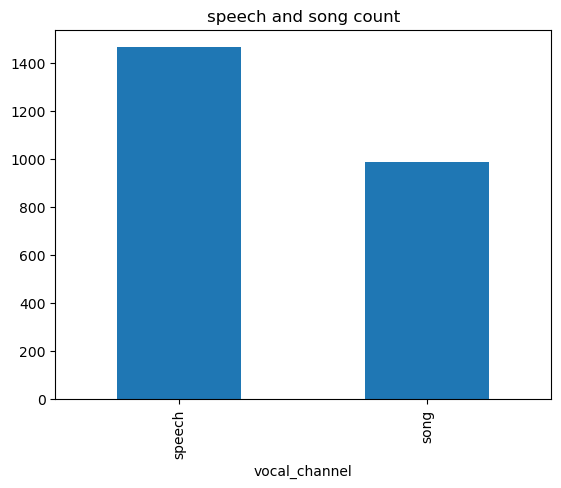

In [15]:
df['vocal_channel'].value_counts().plot(kind='bar', title='speech and song count')
plt.show()

## Filling intensity

<Axes: >

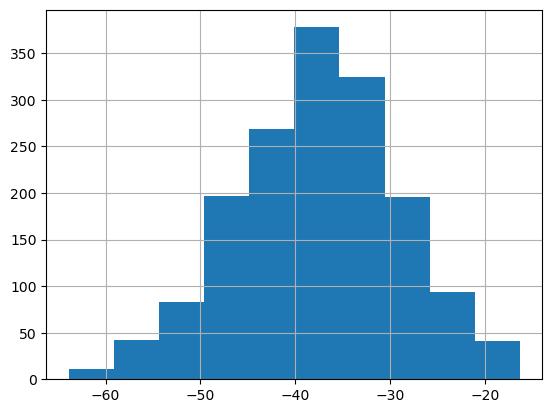

In [16]:
df['intensity'].hist()

In [17]:
na_media =df['intensity'].fillna(df['intensity'].mean())
na_mediana=df['intensity'].fillna(df['intensity'].median())
na_moda=df['intensity'].fillna(df['intensity'].mode()[0])

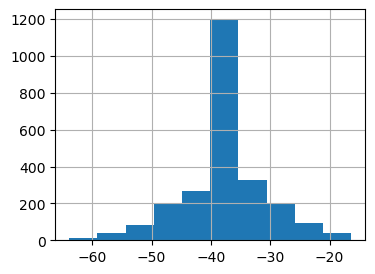

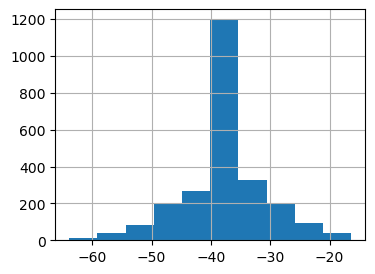

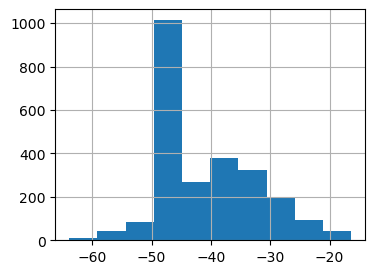

In [18]:
na_media.hist(figsize=(4,3))
plt.show()
na_mediana.hist(figsize=(4,3))
plt.show()
na_moda.hist(figsize=(4,3))
plt.show()

Provando a sostituire i valori nan con la media, mediana, moda si arriva ad una distribuzione che altera profondamente l'andamento iniziale della variabile, quindi proviamo a riempire i valori nan con dei valori randomici che varino in range che rispetta la distribuzione iniziale

In [19]:
valori = df['intensity'].unique()
def fill_randomly(row):
    if pd.isnull(row['intensity']):
        return np.random.choice(valori)
    else:
        return row['intensity']

In [20]:
df['intensity']= df.apply(fill_randomly, axis=1)

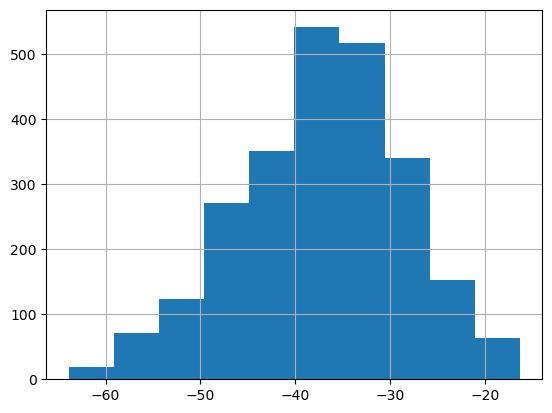

In [21]:
df['intensity'].hist()
plt.show()

## Outliers

In questa sezione si analizzano le features per determinare se sostituire gli outliers

In [22]:
df.columns

Index(['vocal_channel', 'emotion', 'emotional_intensity', 'repetition', 'sex',
       'frame_width', 'length_ms', 'frame_count', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max',
       'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew',
       'stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew', 'mean',
       'std', 'min', 'max', 'kur', 'skew'],
      dtype='object')

In [23]:
#Definisco una funzione per restituire uno scatterplot per ogni colonna
def boxplot_for_each_feature(dataframe):
    # Itera per ogni colonna del df
     for column in dataframe.columns:
        plt.figure(figsize=(8, 6))
        plt.boxplot(dataframe[column])
        plt.title(f'Box Plot {column}')
        plt.ylabel(column)
        plt.show()

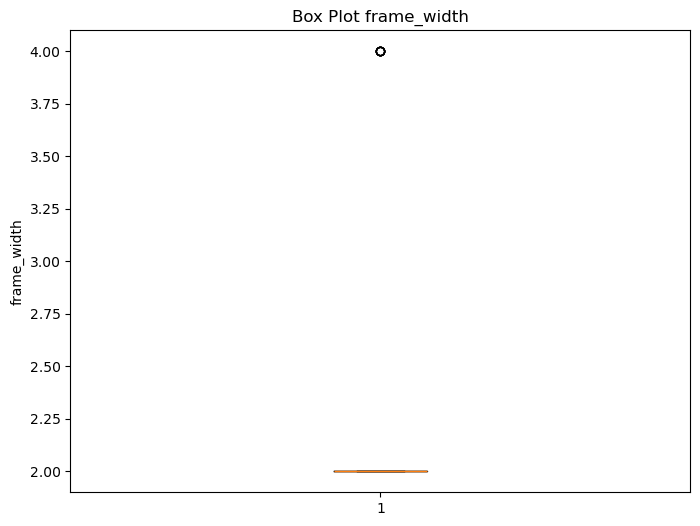

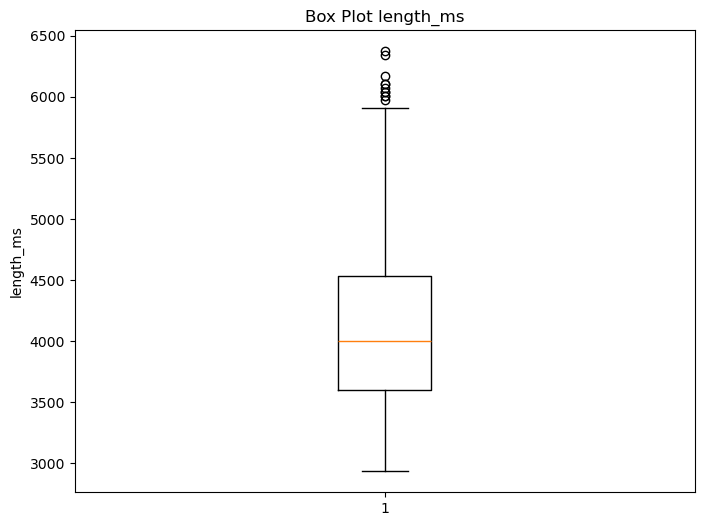

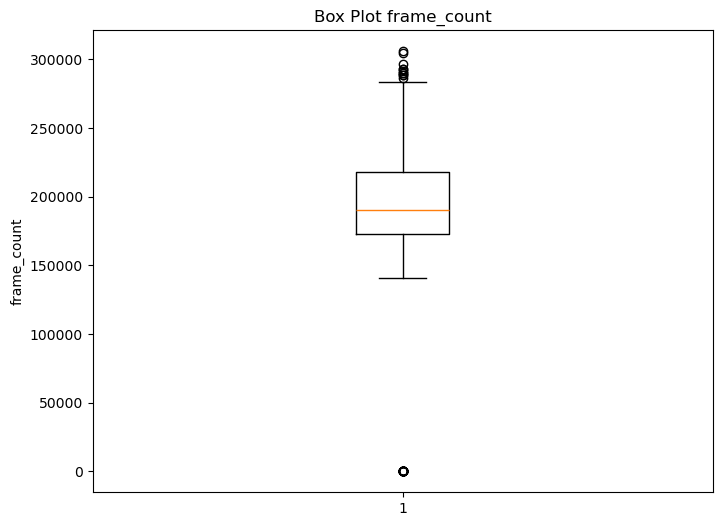

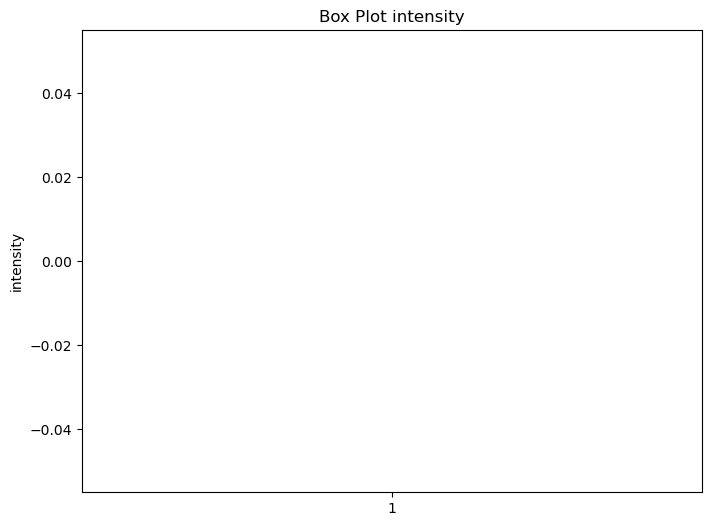

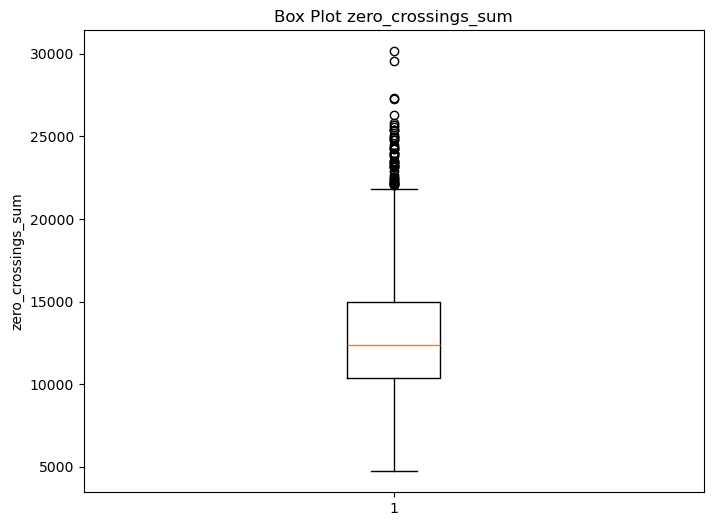

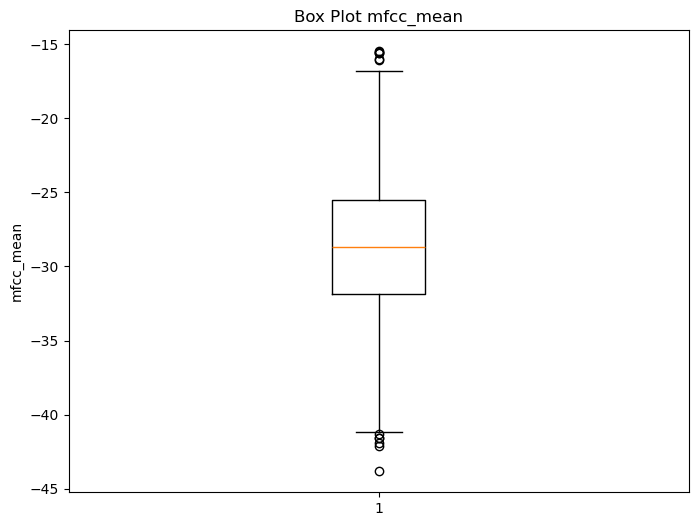

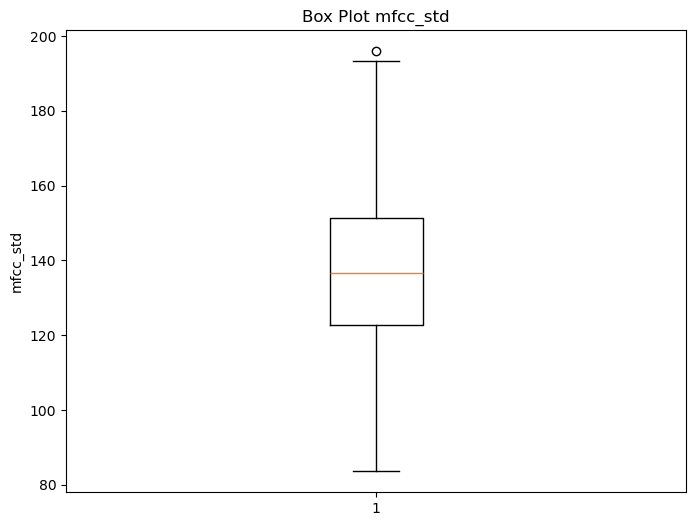

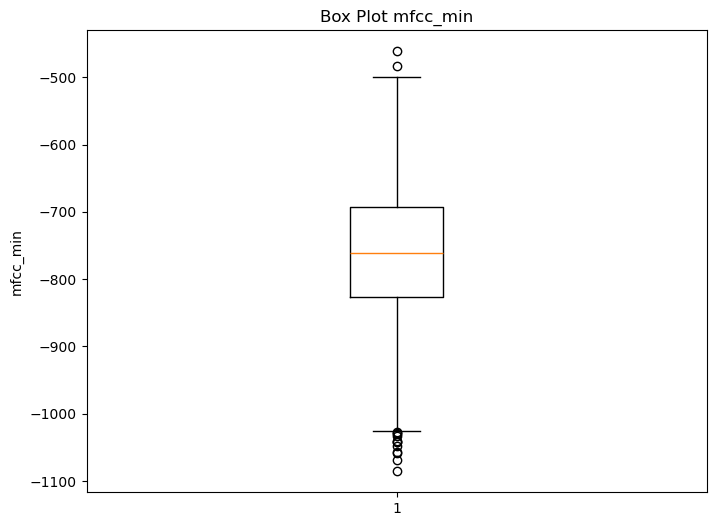

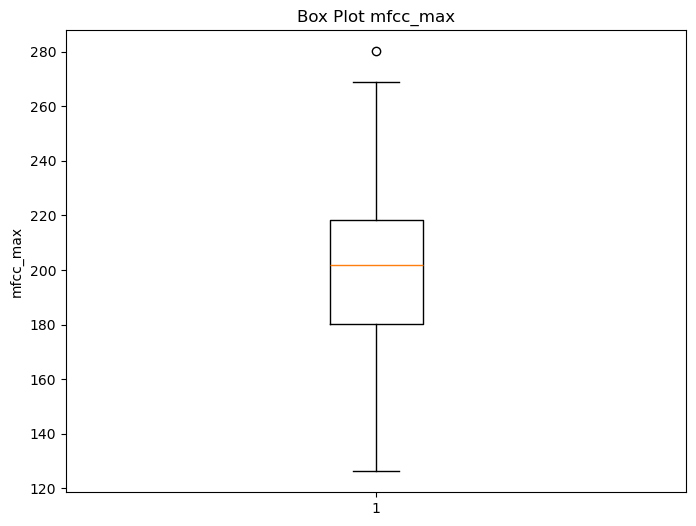

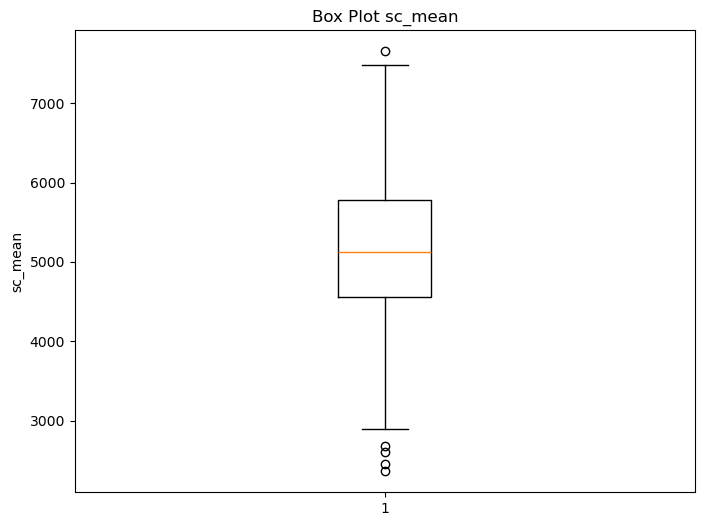

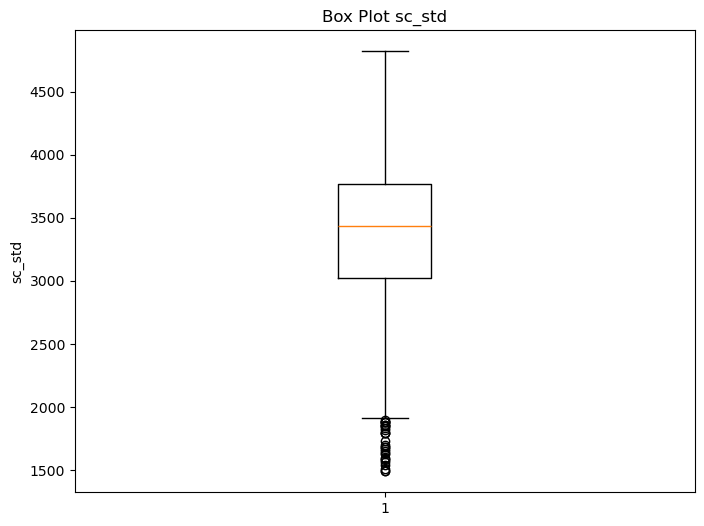

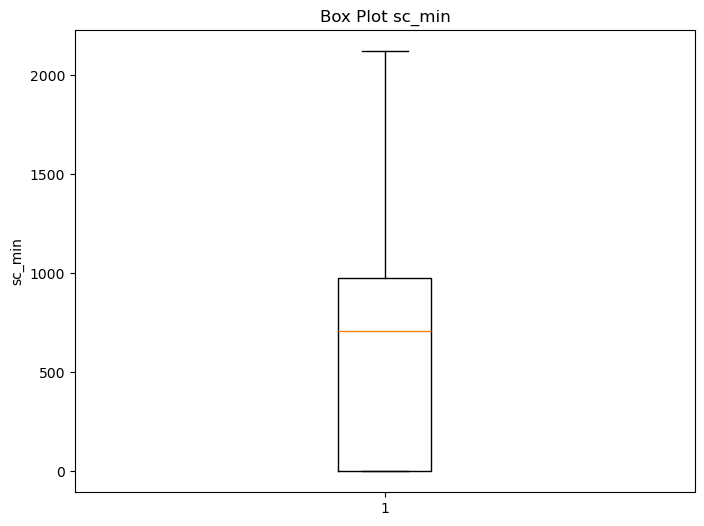

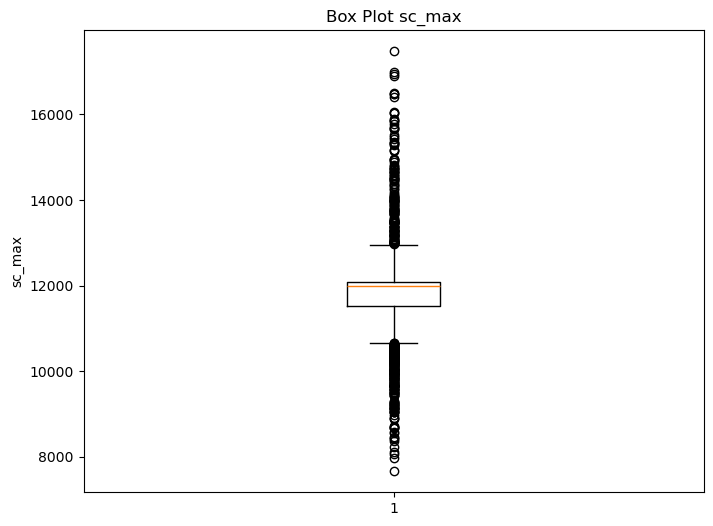

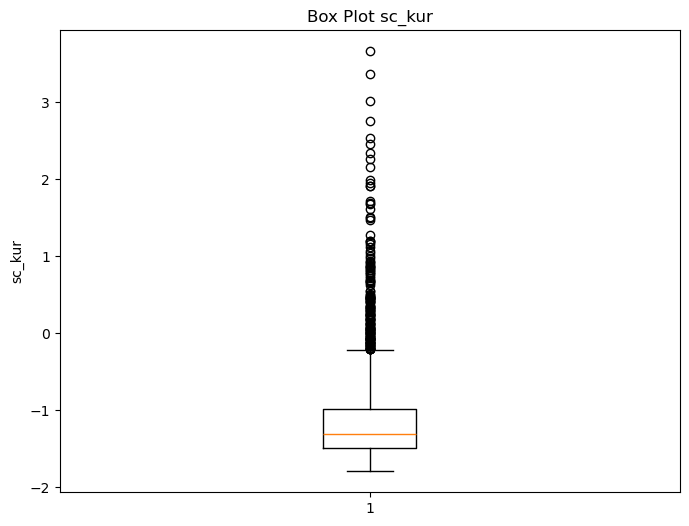

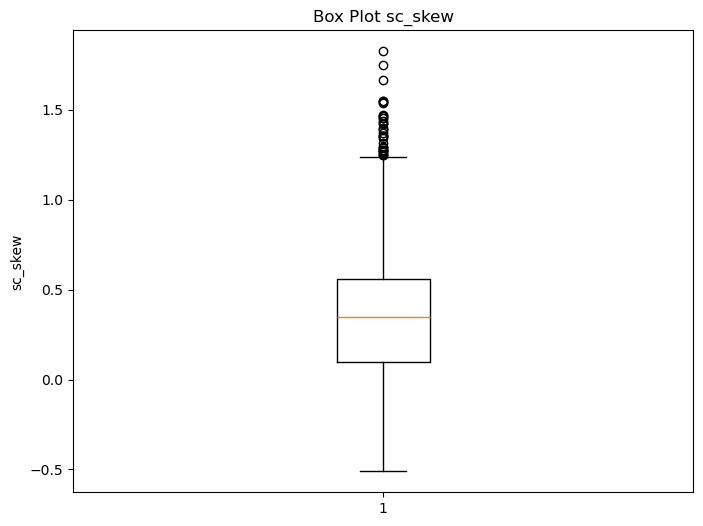

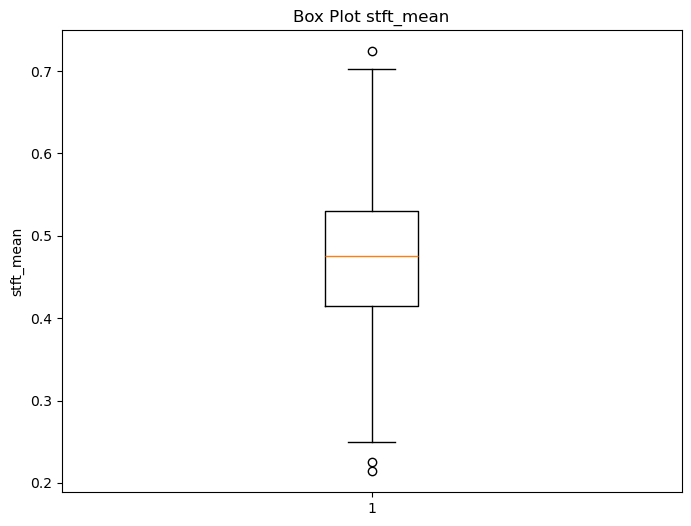

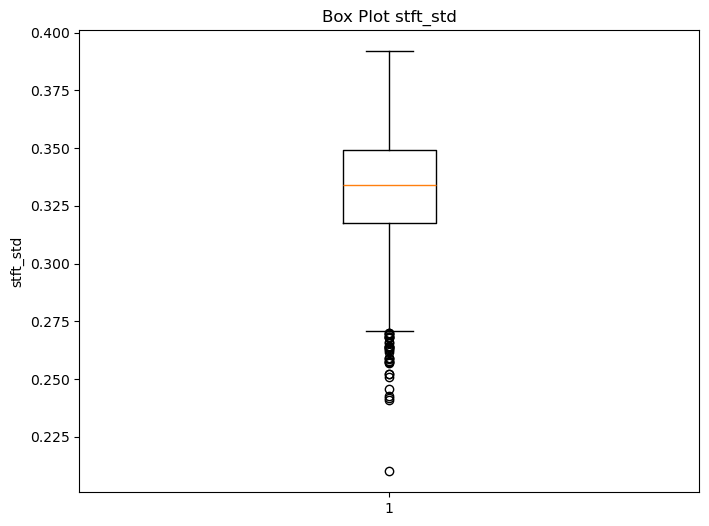

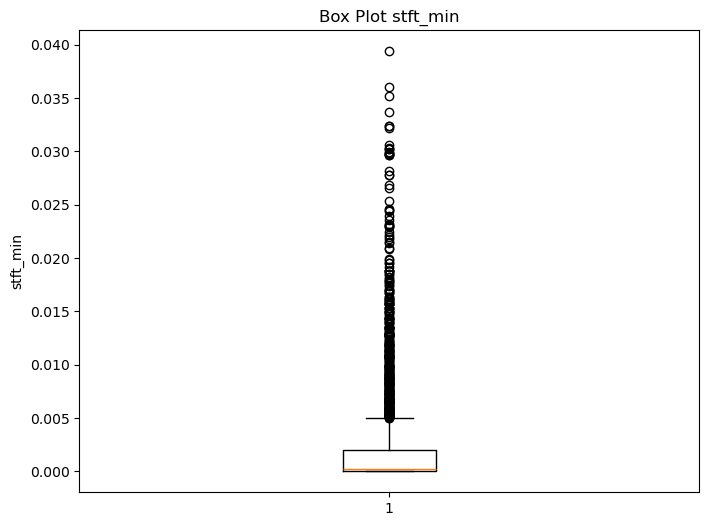

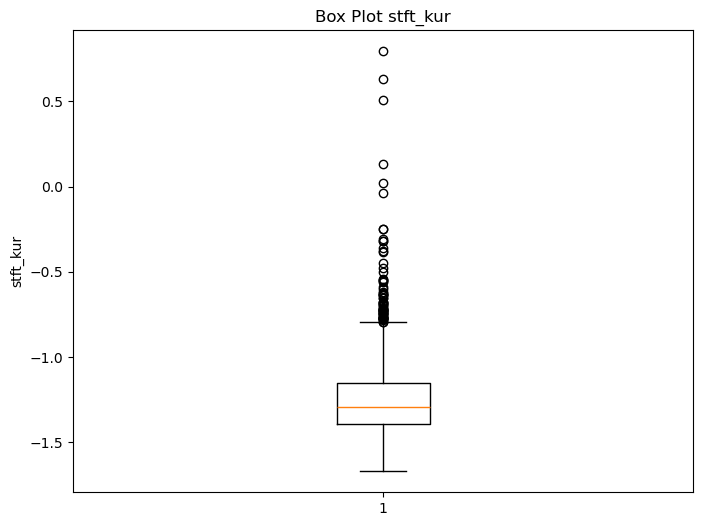

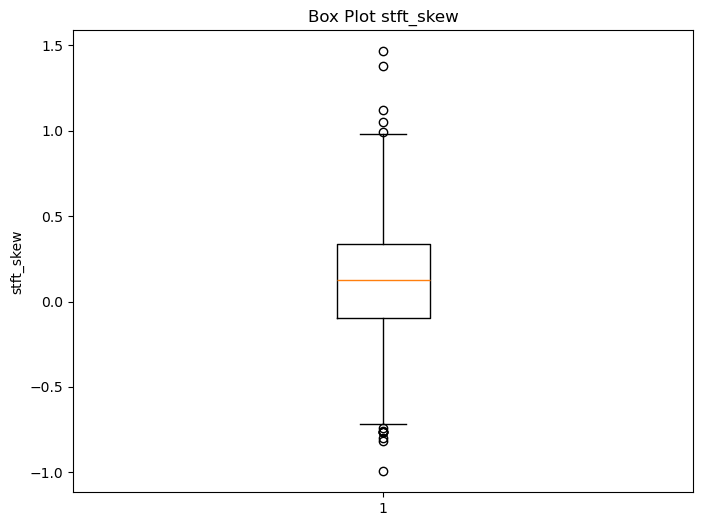

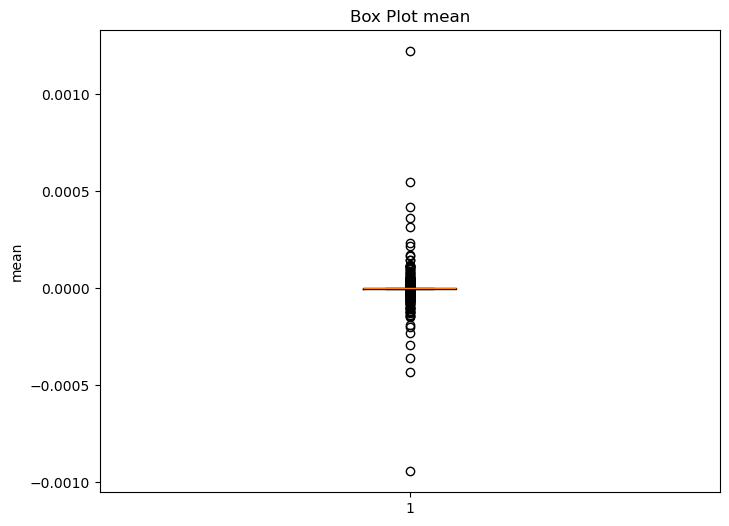

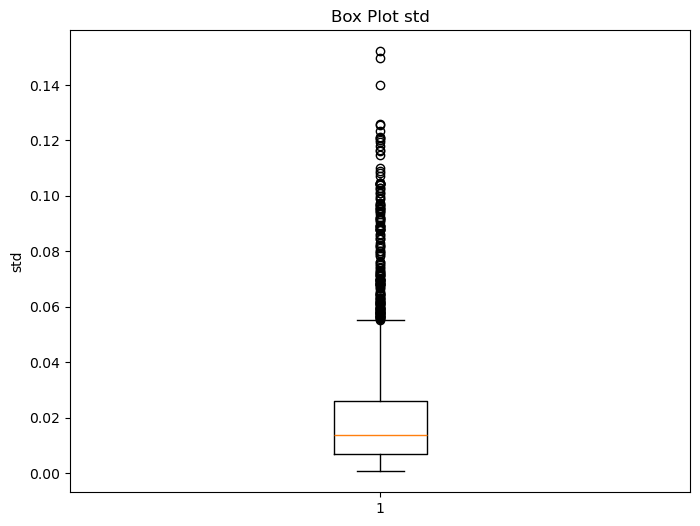

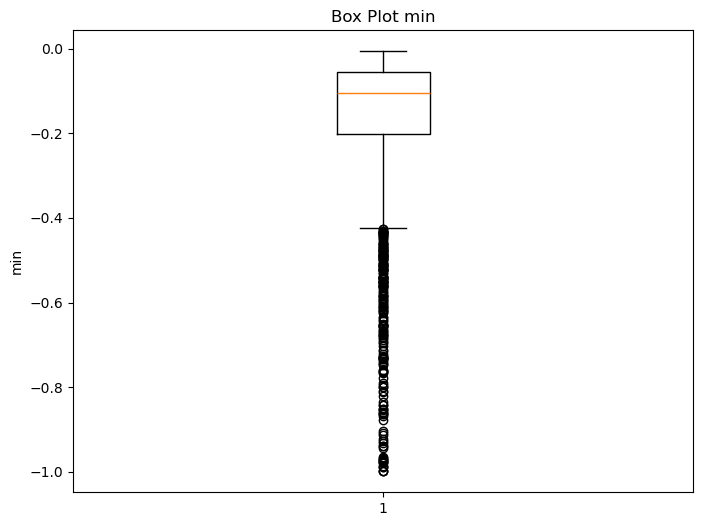

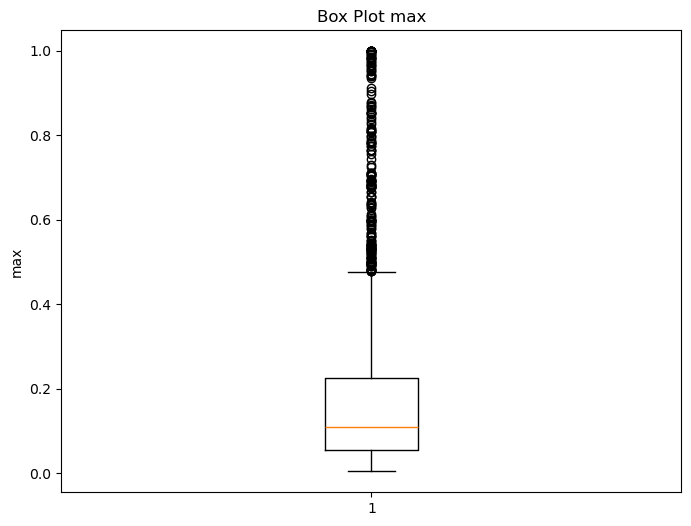

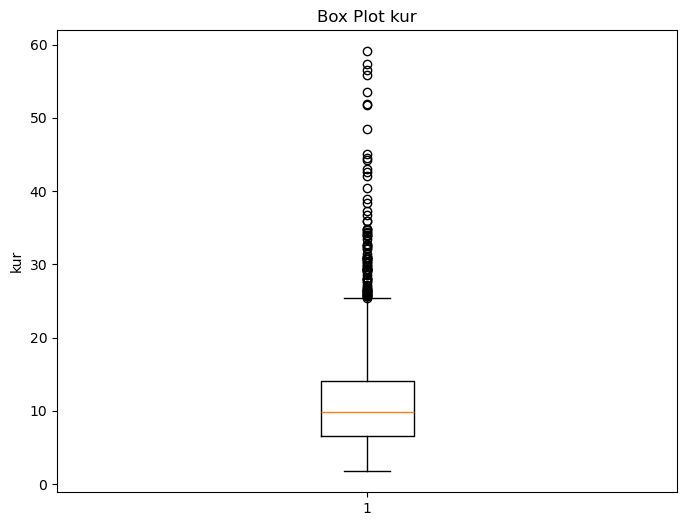

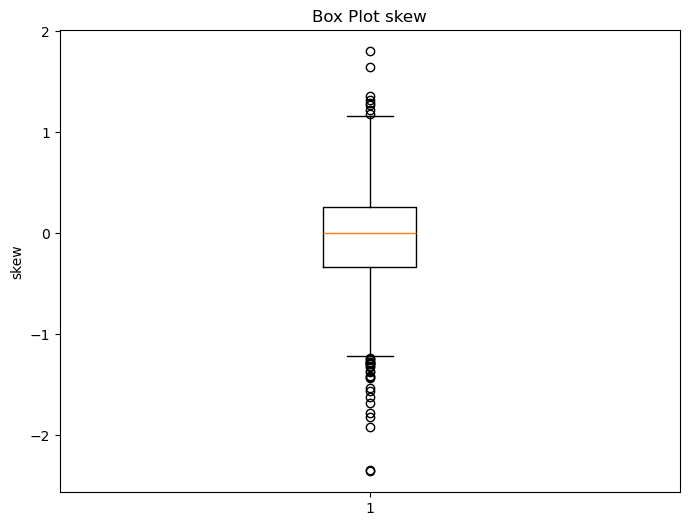

In [24]:
boxplot_for_each_feature(df.select_dtypes(include=np.number))

In [25]:
#Definisco una funzione per restituire uno scatterplot per ogni colonna
def scatter_plots_for_each_feature(dataframe):
    # Itera per ogni colonna del df
    for column in dataframe.columns:
        plt.figure(figsize=(8, 6))
        plt.scatter(dataframe.index, dataframe[column], alpha=0.5)
        plt.title(f'Scatter Plot {column}')
        plt.ylabel(column)
        plt.show()

In [26]:
#Seleziono solo le colonne con valori numerici
#scatter_plots_for_each_feature(df.select_dtypes(include=np.number))

In [27]:
df.columns

Index(['vocal_channel', 'emotion', 'emotional_intensity', 'repetition', 'sex',
       'frame_width', 'length_ms', 'frame_count', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max',
       'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew',
       'stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew', 'mean',
       'std', 'min', 'max', 'kur', 'skew'],
      dtype='object')

Per gestire gli outlier scrivo una funzione che mi permetta di dropparli attraverso il metodo IQR

In [28]:
def fill_outliers(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            continue  
        x = df[column]
        q1 = np.quantile(x, 0.25)
        q3 = np.quantile(x, 0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Trova gli indici degli outlier
        outliers_idx = (x < lower_bound) | (x > upper_bound)

        # Sostituisci gli outlier con il valore della mediana
        #median = np.median(x)
        #df.loc[outliers_idx, column] = median

        # Genera nuovi valori casuali basati sulla distribuzione della serie x
        non_outliers = x[~outliers_idx]
        random_values = np.random.choice(non_outliers, sum(outliers_idx), replace=True)

        # Sostituisci gli outlier con i nuovi valori casuali
        df.loc[outliers_idx, column] = random_values

    return df

In [29]:
df = fill_outliers(df)

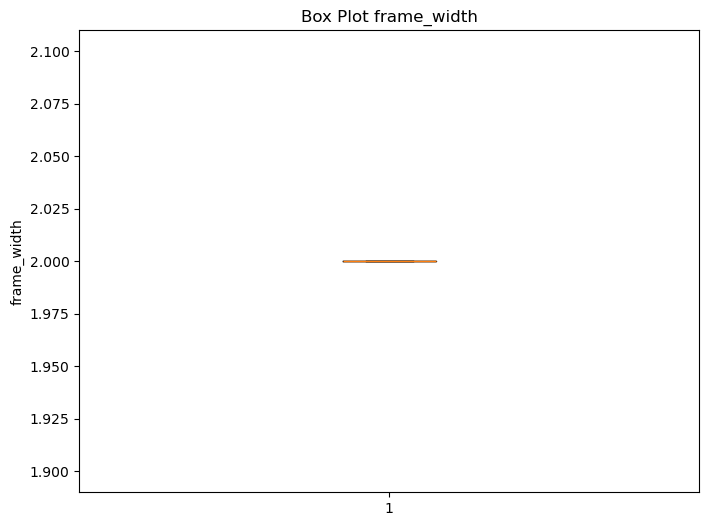

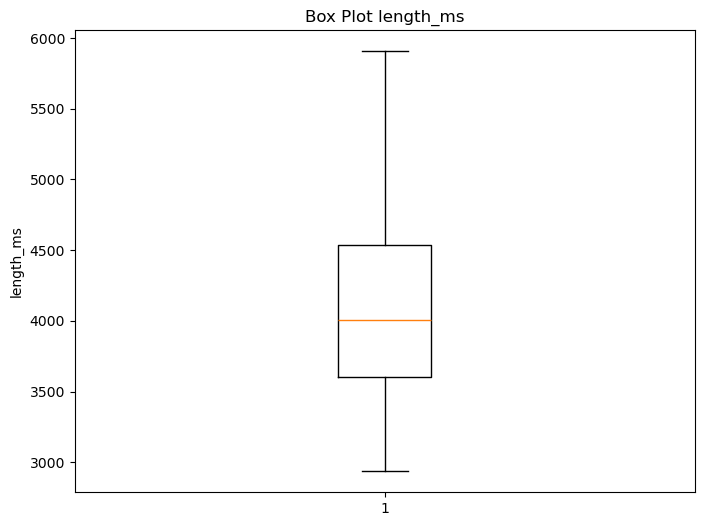

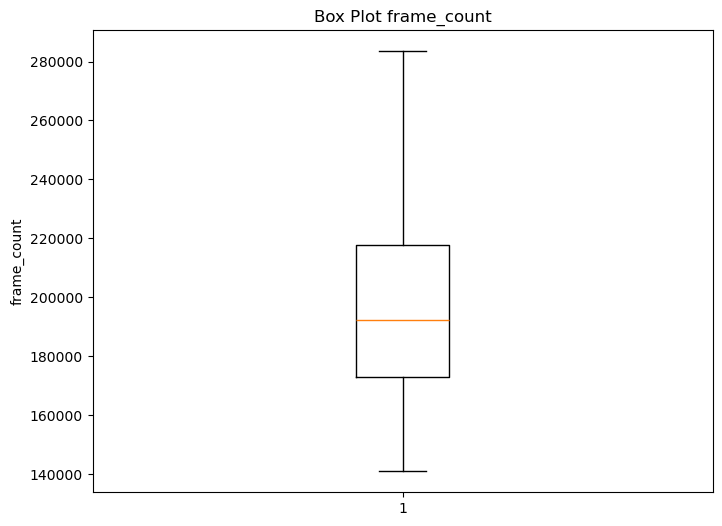

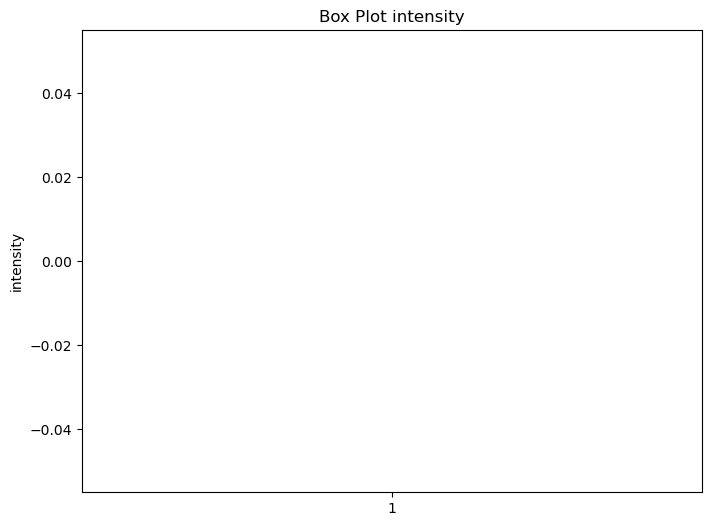

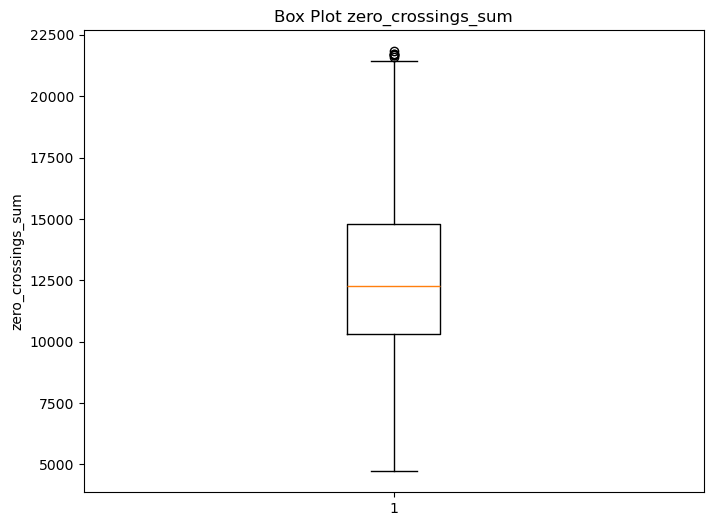

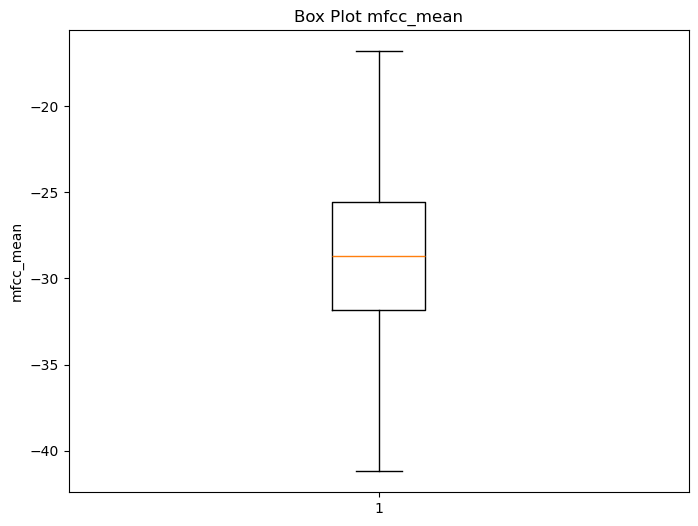

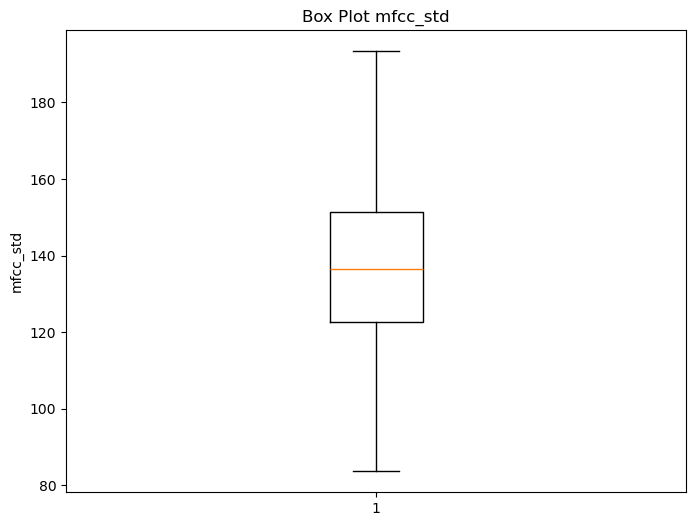

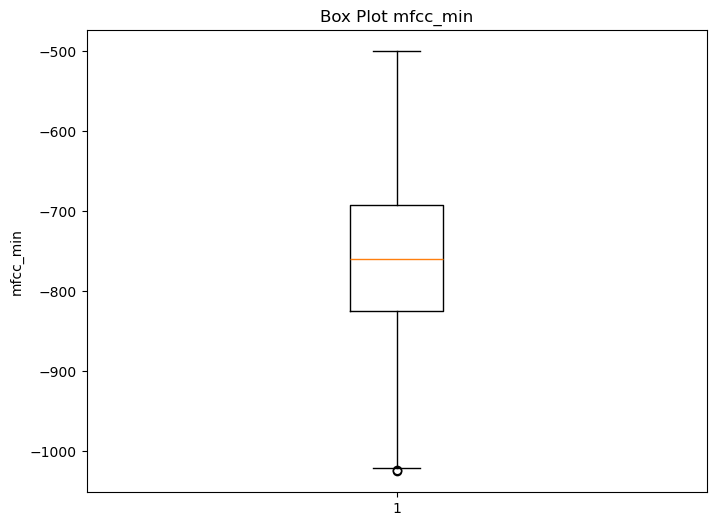

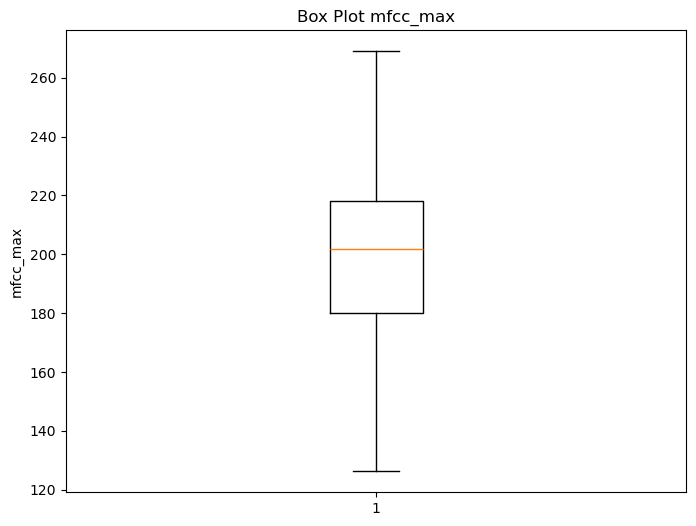

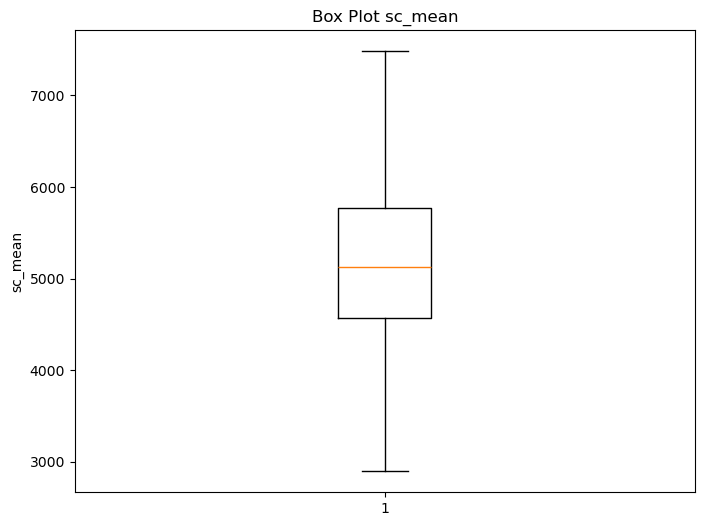

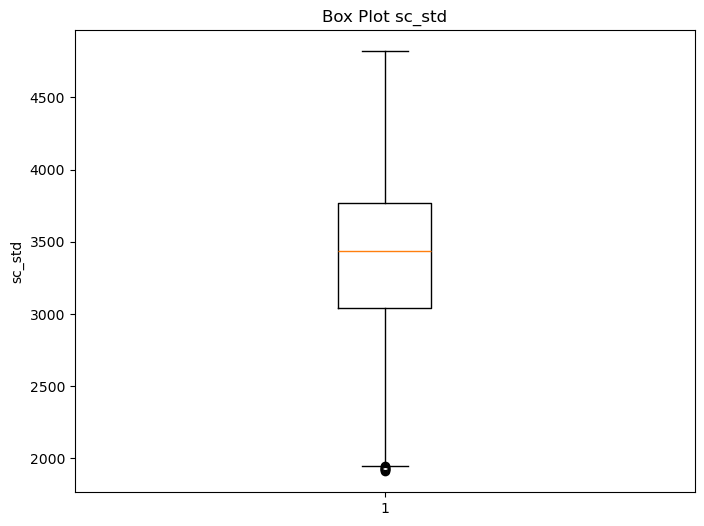

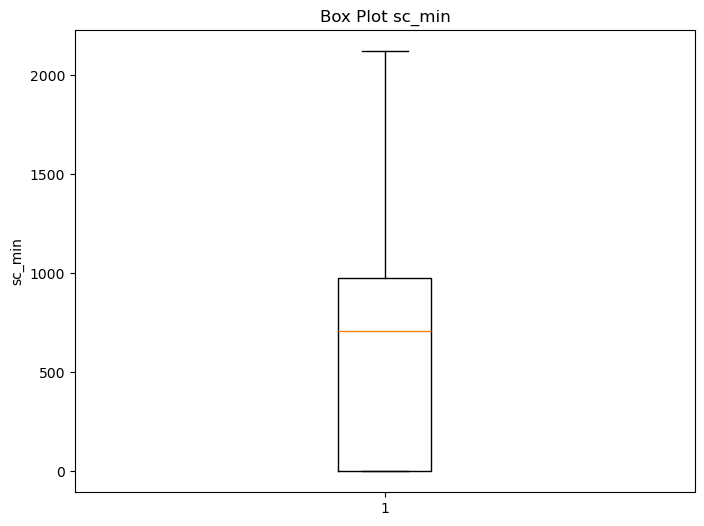

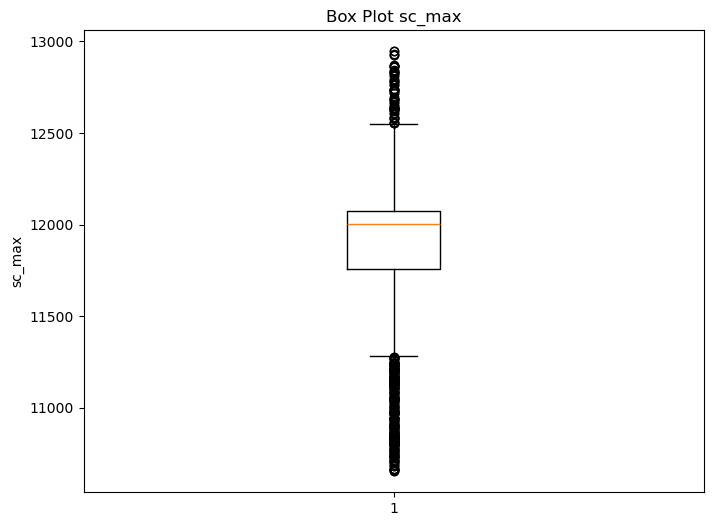

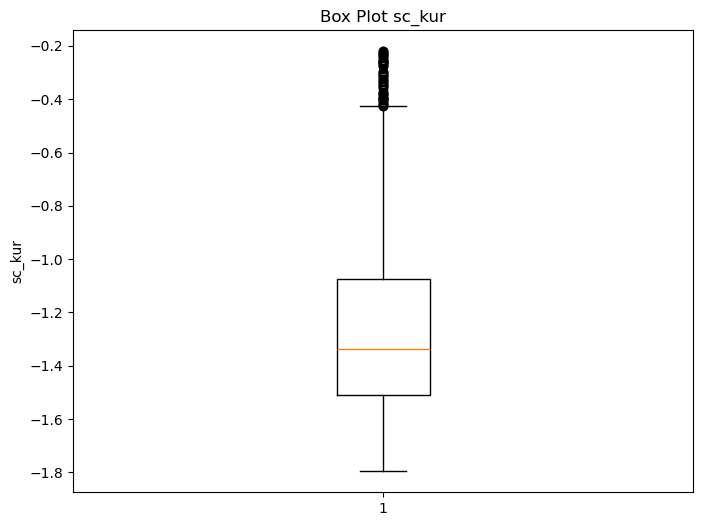

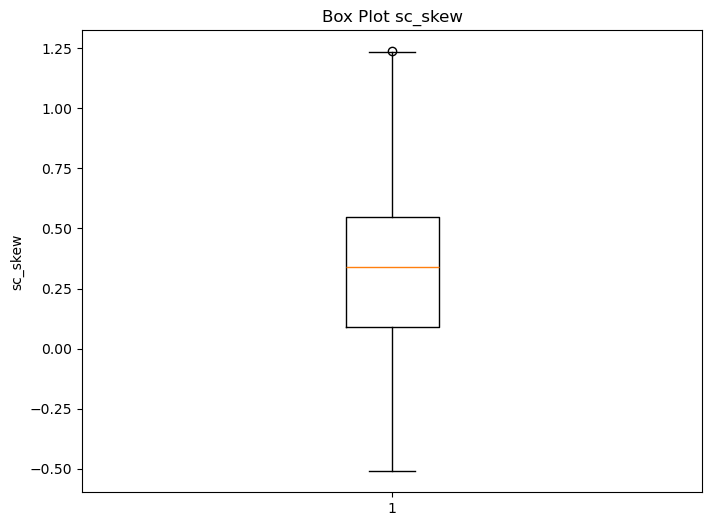

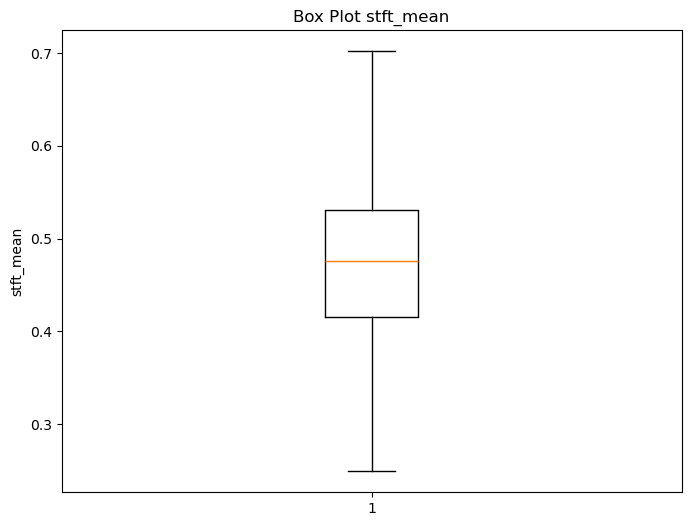

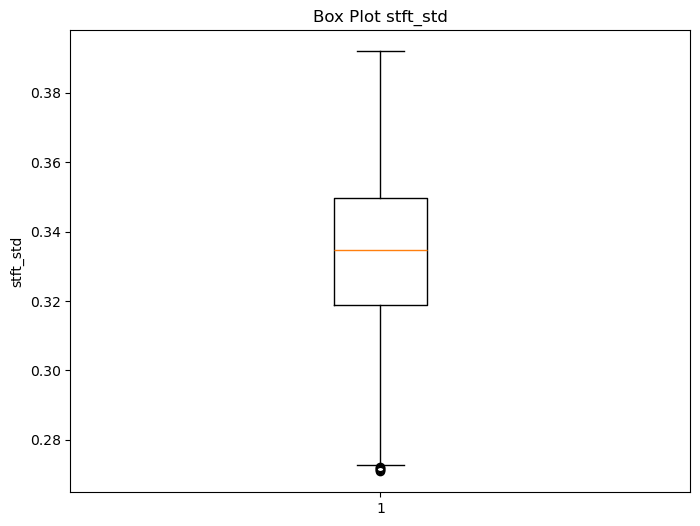

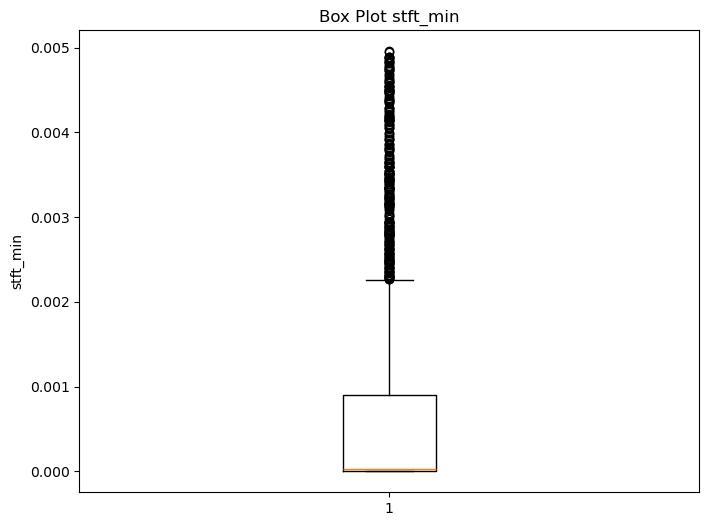

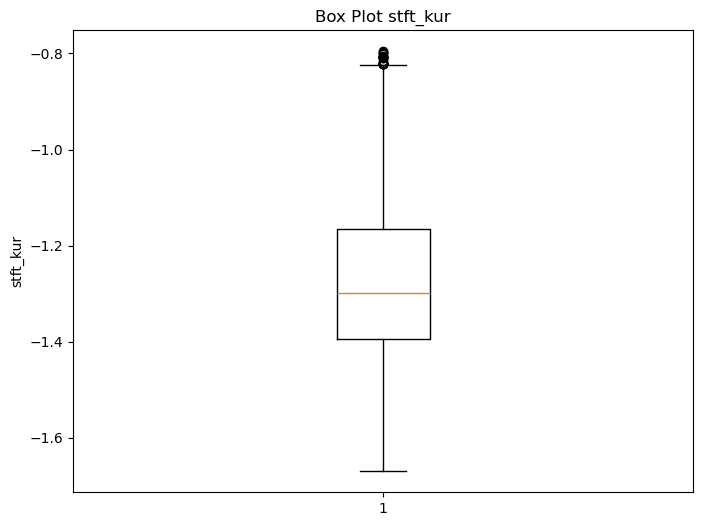

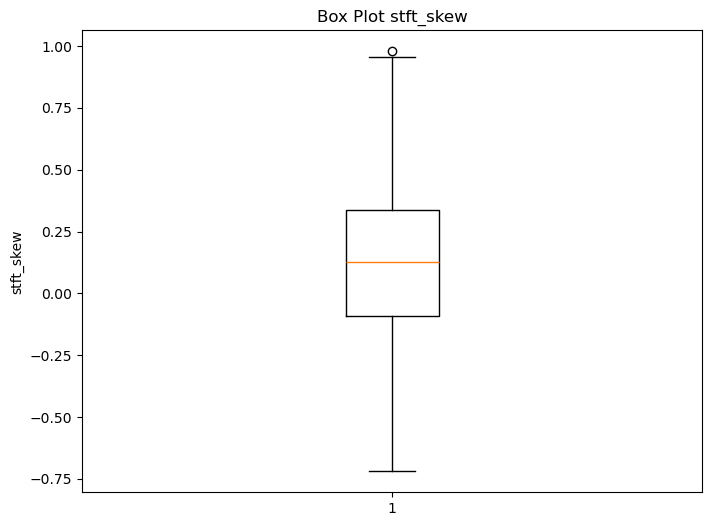

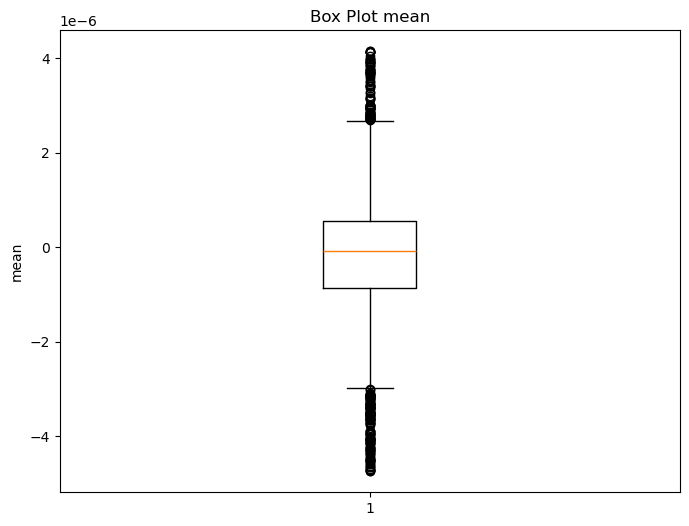

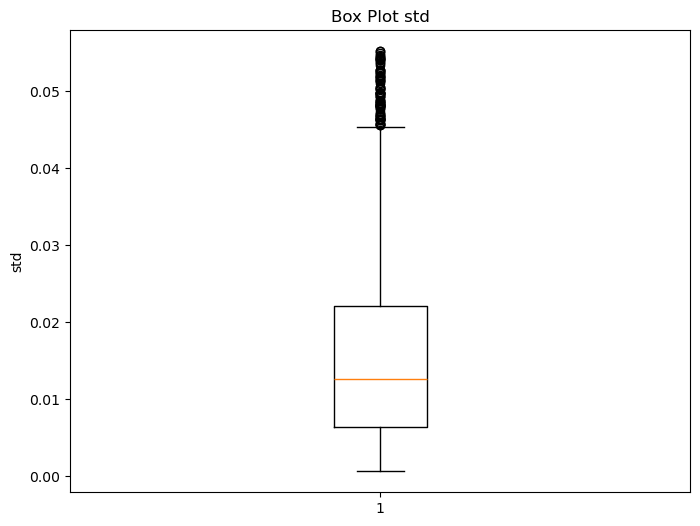

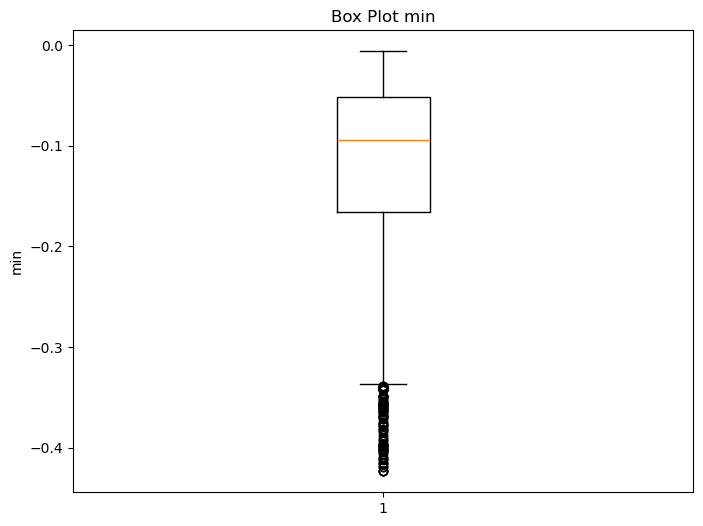

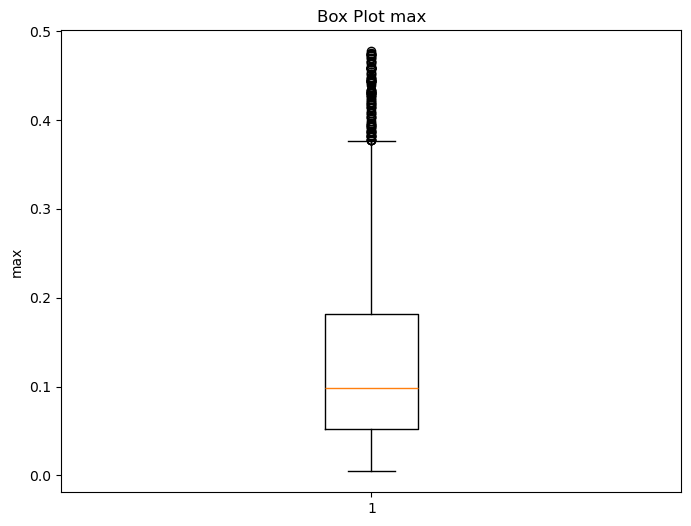

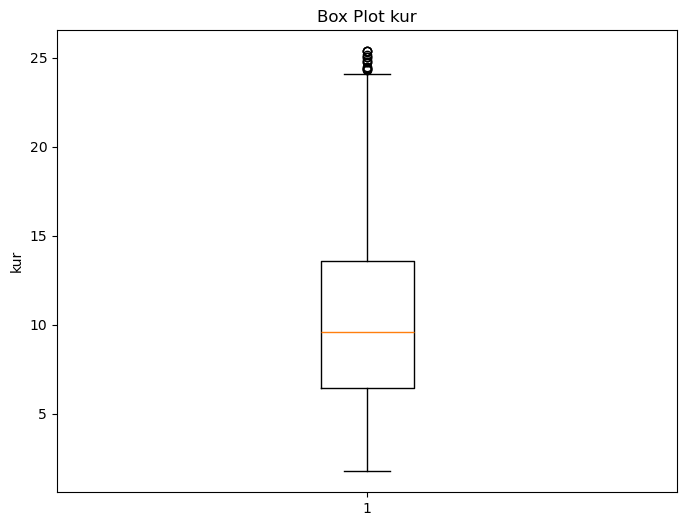

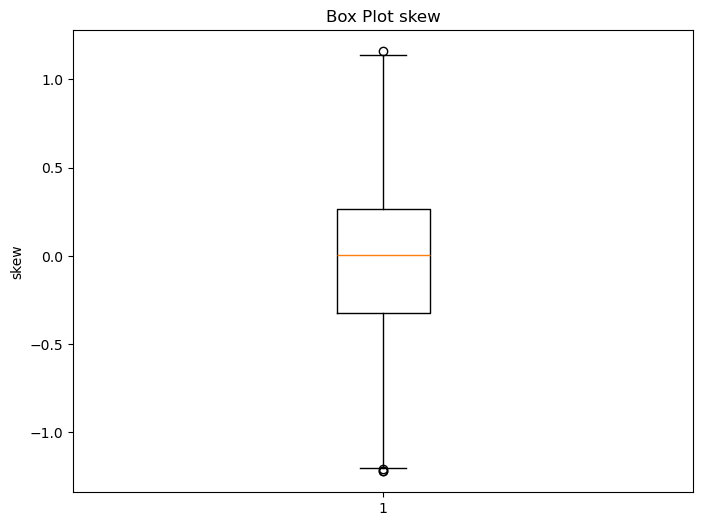

In [30]:
boxplot_for_each_feature(df.select_dtypes(include=np.number))
   

In [31]:
#scatter_plots_for_each_feature(df.select_dtypes(include=np.number))

<Axes: >

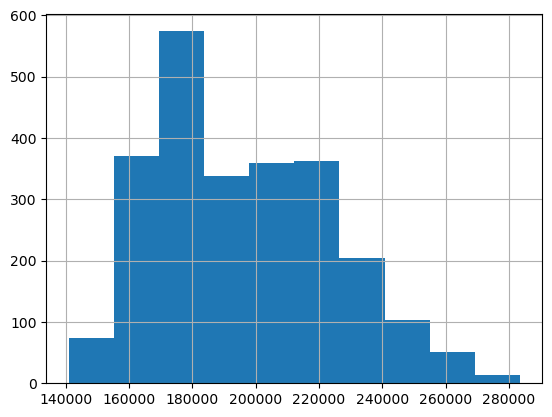

In [32]:
df['frame_count'].hist()

<Axes: >

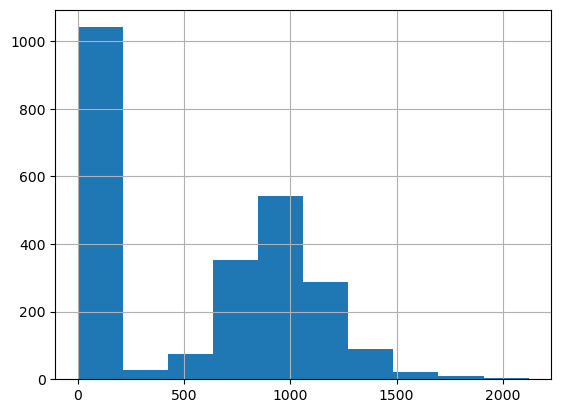

In [33]:
df['sc_min'].hist()

## Variables transformations

In [34]:
#Bisogna trasformare le variabili categoriche

In [35]:
df['sex'] = df['sex'].map({'M': 0, 'F': 1})
df['vocal_channel'] = df['vocal_channel'].map({'speech': 0, 'song': 1})
df['emotional_intensity'] = df['emotional_intensity'].map({'normal': 0, 'strong': 1})
df['repetition'] = df['repetition'].map({'1st': 1, '2nd': 2})

In [36]:
#Emozione dummies
pd.get_dummies(df['emotion']).astype(int)
#Aggiungere al dataframe
df = pd.concat([df, pd.get_dummies(df['emotion']).astype(int)], axis=1)

In [37]:
df.head()

,vocal_channel,emotion,emotional_intensity,repetition,sex,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew,angry,calm,disgust,fearful,happy,neutral,sad,surprised
0,0,fearful,0,2,1,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.0,12000.000018,-1.120769,0.250940,0.415250,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153,0,0,0,1,0,0,0,0
1,0,angry,0,1,1,2,3904,187387.0,-39.427638,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.0,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157,1,0,0,0,0,0,0,0
2,0,happy,1,2,1,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.0,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659,0,0,0,0,1,0,0,0
3,0,surprised,0,1,1,2,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.0,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,1,happy,1,2,1,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.0,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872,0,0,0,0,1,0,0,0


NON FARE CORRELAZIONE TRA CATEGORICHE E CONTINUE

In [38]:
pd.options.display.max_columns = None
display(df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm'))

c:\Users\anto_\anaconda3\envs\env_master\Lib\site-packages\pandas\io\formats\style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\anto_\anaconda3\envs\env_master\Lib\site-packages\pandas\io\formats\style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,vocal_channel,emotional_intensity,repetition,sex,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew,angry,calm,disgust,fearful,happy,neutral,sad,surprised
vocal_channel,1.000000,-0.006109,0.009148,-0.022697,nan,0.730620,0.721324,0.179992,0.159666,0.026442,-0.264145,0.173188,-0.272490,-0.491720,-0.141493,-0.039785,-0.055317,0.248212,0.528197,-0.461389,0.375277,0.062035,-0.125151,0.490720,0.054824,0.251330,-0.144624,0.154496,-0.538056,0.007522,0.054582,0.068430,-0.226859,0.073046,0.040734,0.044772,0.073046,-0.233050
emotional_intensity,-0.006109,1.000000,-0.000000,0.000256,nan,0.107755,0.105893,0.250690,0.234019,0.304017,-0.418715,0.409451,-0.215781,-0.116353,-0.239262,0.076052,-0.029962,0.187681,0.186040,-0.080277,0.006632,0.036520,-0.004127,0.101681,0.036121,0.329687,-0.325910,0.322808,0.060063,0.134762,0.032726,0.032726,0.022414,0.032726,0.032726,-0.266856,0.032726,0.022414
repetition,0.009148,-0.000000,1.000000,-0.000000,nan,0.007852,0.007210,0.005530,0.020545,0.015068,-0.019725,0.016796,-0.004148,-0.010244,-0.009529,0.008414,-0.004635,-0.008674,0.017250,-0.015265,0.005289,0.010367,0.004901,0.019313,0.017906,0.019153,-0.038441,0.001452,-0.027583,0.003910,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
sex,-0.022697,0.000256,-0.000000,1.000000,nan,0.074880,0.075147,0.053938,0.380639,-0.536416,-0.110180,0.126464,-0.545226,0.042193,0.087394,-0.301492,0.120498,0.068953,0.012593,-0.572572,0.571381,-0.441458,-0.164842,0.457584,0.074253,0.070833,-0.042460,0.058029,-0.088609,0.115130,-0.001418,-0.001418,0.005231,-0.001418,-0.001418,-0.000960,-0.001418,0.005231
frame_width,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
length_ms,0.730620,0.107755,0.007852,0.074880,nan,1.000000,0.979193,0.195111,0.324331,0.011729,-0.313306,0.205068,-0.355089,-0.524730,-0.187439,-0.064137,-0.031239,0.275814,0.598822,-0.545521,0.385872,-0.038298,-0.118424,0.581958,0.070576,0.230396,-0.127328,0.120484,-0.514118,0.067227,0.076429,0.198704,-0.071030,-0.091239,-0.003078,-0.041915,0.124870,-0.297452
frame_count,0.721324,0.105893,0.007210,0.075147,nan,0.979193,1.000000,0.194031,0.321238,0.012865,-0.311736,0.204684,-0.347257,-0.524335,-0.180873,-0.062136,-0.036878,0.271118,0.597605,-0.538315,0.382234,-0.035430,-0.120464,0.575713,0.071416,0.232136,-0.132649,0.125677,-0.503295,0.070967,0.076541,0.190328,-0.070089,-0.086271,-0.002987,-0.042146,0.124011,-0.292713
intensity,0.179992,0.250690,0.005530,0.053938,nan,0.195111,0.194031,1.000000,0.285617,0.374748,-0.626040,0.609710,-0.257934,-0.211534,-0.253658,0.077464,-0.087207,0.204121,0.275831,-0.219332,0.088800,0.064949,-0.027985,0.239202,0.114671,0.480641,-0.446749,0.445486,-0.058158,0.256202,0.276250,-0.202265,-0.064237,0.119728,0.101526,-0.098569,-0.133069,-0.055314
zero_crossings_sum,0.159666,0.234019,0.020545,0.380639,nan,0.324331,0.321238,0.285617,1.000000,0.077757,-0.505916,0.433020,-0.411437,-0.081624,-0.333314,0.144103,-0.047182,0.207700,0.144172,-0.396713,0.099975,-0.099799,0.057683,0.423873,0.094490,0.381170,-0.343936,0.333380,-0.101827,0.203966,0.209333,-0.124767,0.104892,0.062273,0.019439,-0.141072,-0.069979,-0.094332
mfcc_mean,0.026442,0.304017,0.015068,-0.536416,nan,0.011729,0.012865,0.374748,0.077757,1.000000,-0.600993,0.582755,0.169778,-0.277198,-0.549920,0.401324,-0.270799,0.241287,0.222222,0.304752,-0.390315,0.386979,0.070378,-0.174934,0.024438,0.455493,-0.464759,0.436983,0.147741,0.049850,0.332046,-0.210989,-0.025643,0.128030,0.082754,-0.155864,-0.163563,-0.045689


In [39]:
df['frame_width'].unique()

array([2], dtype=int64)

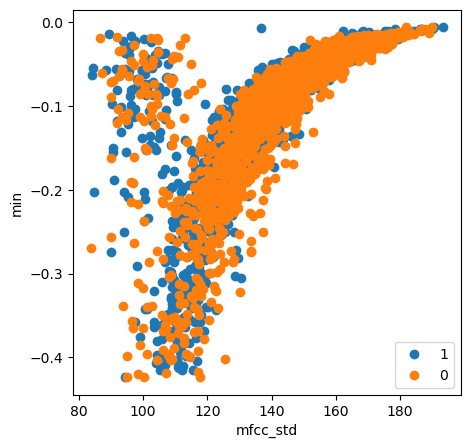

In [40]:
x = 'mfcc_std'
y = 'min'

plt.figure(figsize=(5,5))
for c in df['sex'].unique():
    plt.scatter(df[df['sex'] == c][x], df[df['sex'] == c][y], label=c)

plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

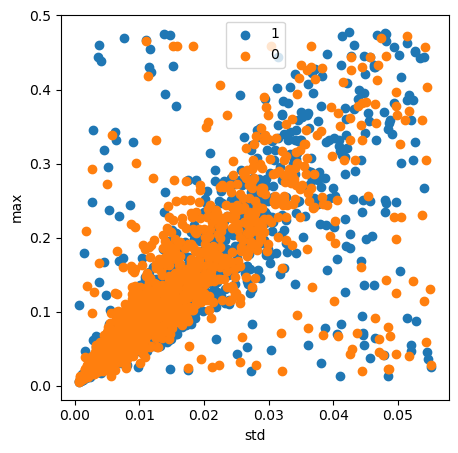

In [41]:
x = 'std'
y = 'max'

plt.figure(figsize=(5,5))
for c in df['sex'].unique():
    plt.scatter(df[df['sex'] == c][x], df[df['sex'] == c][y], label=c)

plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

## Clustering

In [42]:
#dfs = df[['frame_count', 'intensity','zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 
              #'mfcc_max','sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew','stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew', 'mean','std', 'min', 'max', 'kur', 'skew']]

In [43]:
dfs = df[['std', 'min', 'max', 'kur', 'skew']]

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
dfs_val = dfs.values

In [46]:
scaler = StandardScaler()
dfs_tse = scaler.fit_transform(dfs_val)

In [47]:
#Se provo a fare lo stesso con t-SNE
from sklearn.manifold import TSNE

In [48]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(dfs_tse)

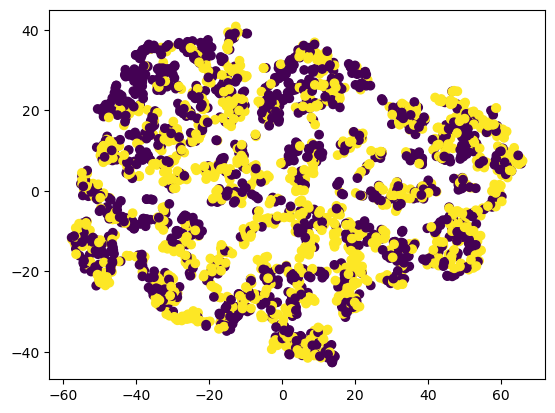

In [49]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['sex'])
plt.show()

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dfs_val)

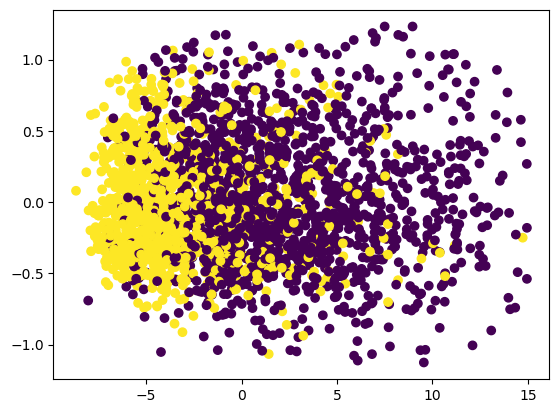

In [52]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['vocal_channel'])
plt.show()

## Feature selection

In [53]:
df.columns

Index(['vocal_channel', 'emotion', 'emotional_intensity', 'repetition', 'sex',
       'frame_width', 'length_ms', 'frame_count', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max',
       'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew',
       'stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew', 'mean',
       'std', 'min', 'max', 'kur', 'skew', 'angry', 'calm', 'disgust',
       'fearful', 'happy', 'neutral', 'sad', 'surprised'],
      dtype='object')

In [54]:
#dfprova = df[['frame_count', 'intensity','zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 
              #'mfcc_max','sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew','stft_mean', 'stft_std', 'stft_min', 'stft_kur', 'stft_skew', 'mean','std', 'min', 'max', 'kur', 'skew']] #sse 34870.90260850529 SIL 0.12164126338368493

In [55]:
dfprova = df[['std', 'min', 'max', 'kur', 'skew']]

In [56]:
#dfprova = df.select_dtypes(include=np.number) #Cluster 12 SSE 4130.639842000641  sil 0.16007867256927064

In [57]:
X = scaler.fit_transform(dfprova)

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 8, n_init=100, max_iter=300, random_state=0)
y_means = kmeans.fit_predict(X)


In [59]:
kmeans.labels_

array([6, 2, 6, ..., 1, 0, 4])

In [60]:
kmeans.inertia_

3650.2995573286175

In [61]:
df['kmeans_label'] = kmeans.labels_

In [62]:
#Silhouette
from sklearn.metrics import silhouette_score, silhouette_samples
#Si può fare un grafico per capire i migliori valori di k insieme alla silhouette
#In silhouette_score invece dei dati io posso passare i valori di distanza precalcolati
#Per calcolare la matrice delle distanze importo pdist e squarepoinjt
from scipy.spatial.distance import pdist, squareform

In [63]:
#Calcolo la matrice delle distanze di x
D = squareform(pdist(X))

In [64]:
#Metto in score la matrice delle distanze e le labels, precomputed serve ad indicare che le distanze sono già state calcolate da noi
silhouette_score(D, kmeans.labels_, metric='precomputed')

0.23371908463798644

In [65]:
#Oltre a SSE metto in lista la silhouette score media fatta con precomputed (che è più veloce)
sse_list = list()
sil_list = list()
max_k = 30
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    sse_list.append(kmeans.inertia_)
    sil_list.append(silhouette_score(D, kmeans.labels_, metric='precomputed'))

<Figure size 600x400 with 0 Axes>

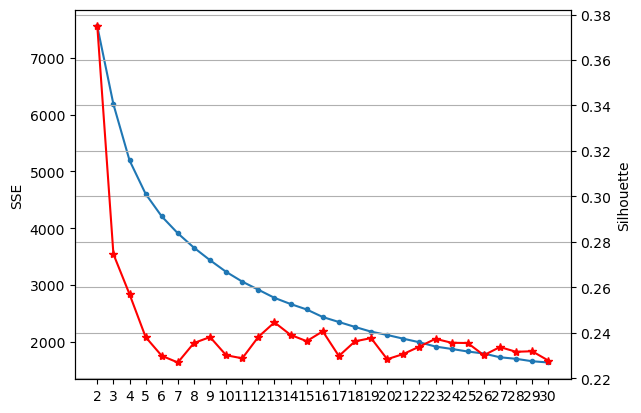

In [66]:
#Posso mettere insieme i due grafici(SSE e Silh) per avere una visione d'insieme
plt.figure(figsize=(6,4))
fig, ax1 = plt.subplots()

ax1.plot(range(2, max_k + 1), sse_list, marker='.')
ax1.set_ylabel('SSE')

ax2 = ax1.twinx()
ax2.plot(range(2, max_k + 1), sil_list, marker='*', c='r')
ax2.set_ylabel('Silhouette')

plt.xlabel('k')
plt.xticks(range(2, max_k + 1))
plt.grid()
plt.show()

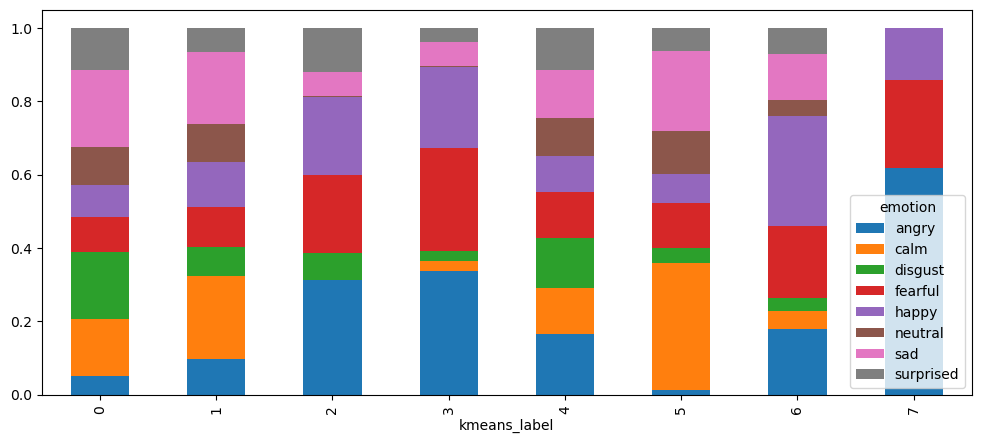

In [67]:
#Tipologie di cluster in kmeans, puri e impuri
ct = pd.crosstab(df['kmeans_label'], df['emotion'])
ct.div(ct.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(12,5))
plt.show()

Per visualizzare i cluster ottenuti dalla clusterizzazione KMeans, utilizzo un grafico a dispersione. Dato che i dati sono multidimensionali, è possibile utilizzare tecniche di riduzione della dimensionalità come PCA (Principal Component Analysis) o t-SNE (t-distributed Stochastic Neighbor Embedding) per ridurre i dati a 2D al fine di generarne il grafico

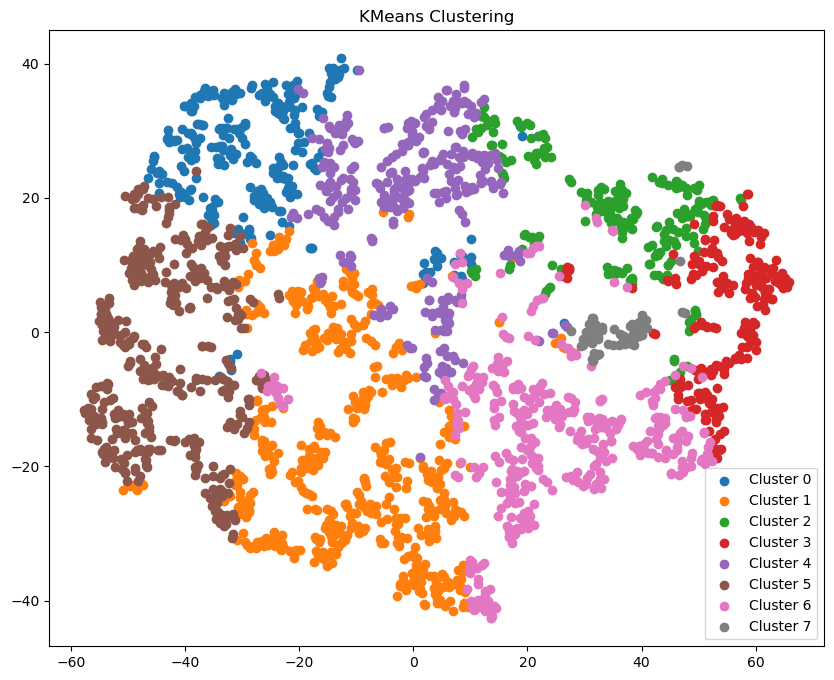

In [68]:
# Add cluster labels to the original DataFrame
df['Cluster'] = y_means

# Plot the clusters
plt.figure(figsize=(10, 8))
for i in range(8):  # Assuming 8 clusters
    cluster_points = X_tsne[df['Cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.title('KMeans Clustering')
plt.legend()
plt.show()

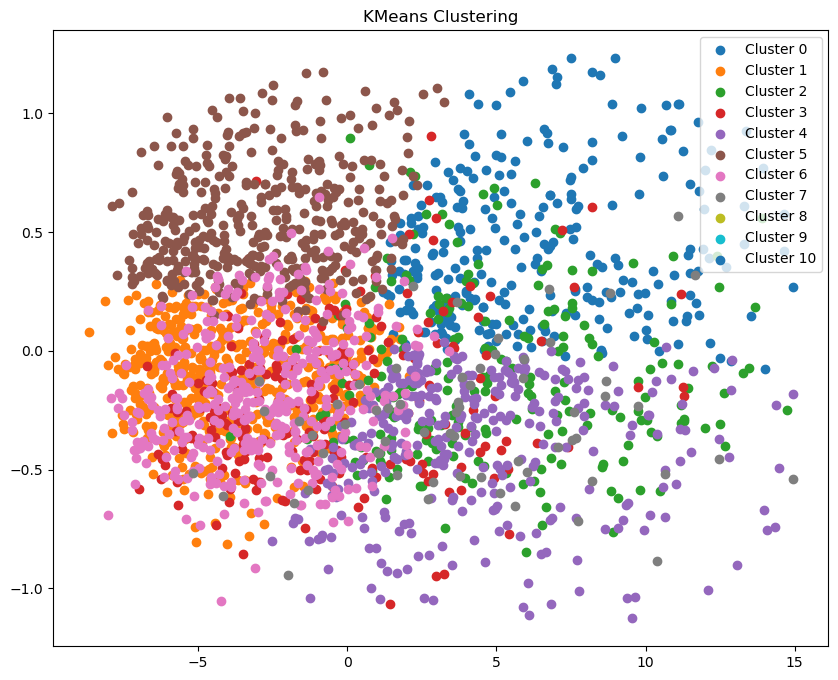

In [69]:
# Add cluster labels to the original DataFrame
df['Cluster'] = y_means

# Plot the clusters
plt.figure(figsize=(10, 8))
for i in range(11):  # Assuming 11 clusters
    cluster_points = X_pca[df['Cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [79]:
import seaborn as sns

In [72]:
from sklearn.cluster import DBSCAN

1.0
0.5
0.3333333333333333
0.25
0.2
0.16666666666666666
0.14285714285714285
0.125
0.1111111111111111
0.1


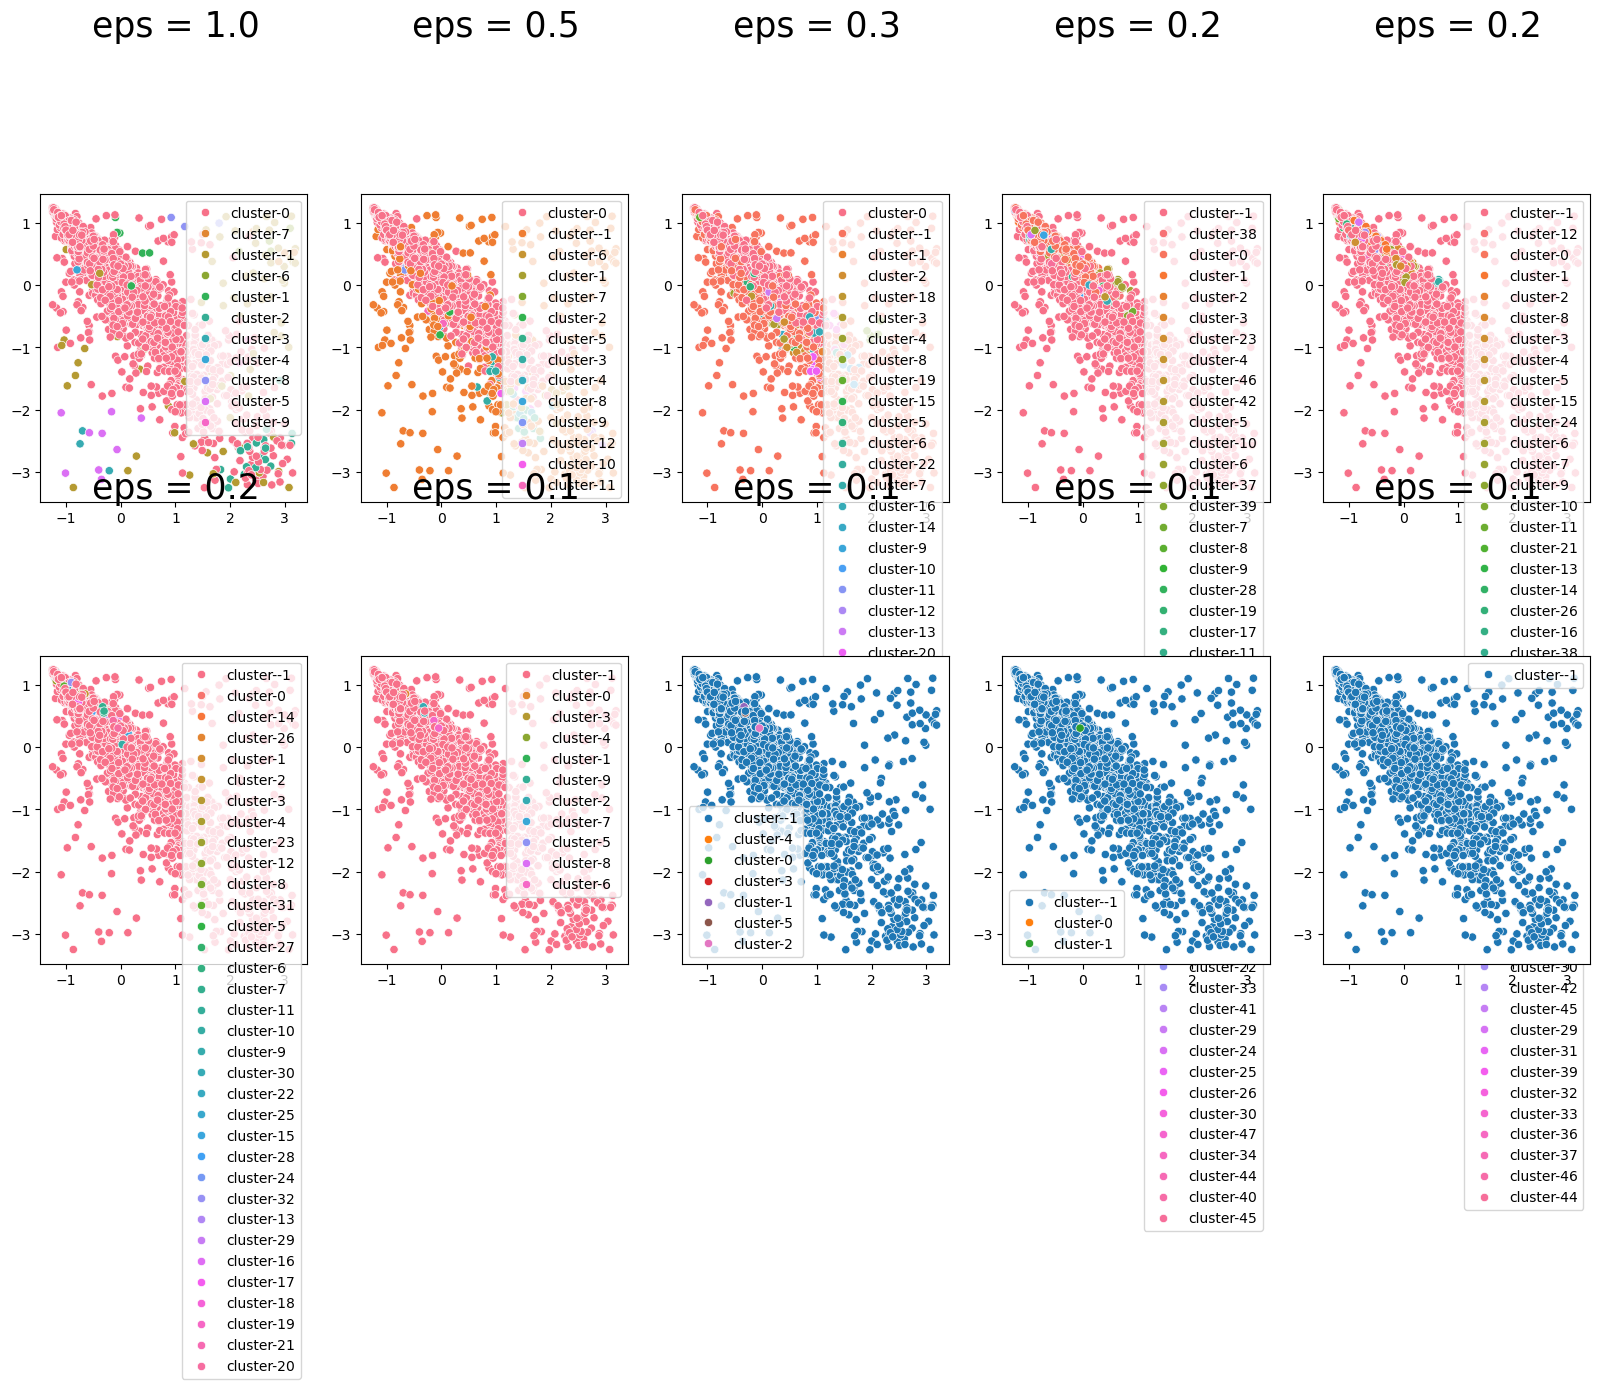

In [95]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1

for x in range(10, 0, -1):
    eps = 1 / (11 - x)
    db = DBSCAN(eps=eps, min_samples=4).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    print(eps)
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 1)), fontsize=25, ha="center")
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=["cluster-{}".format(x) for x in labels], ax=ax)

    i += 1

plt.show()

In [98]:
from sklearn.neighbors import NearestNeighbors

from kneed import KneeLocator

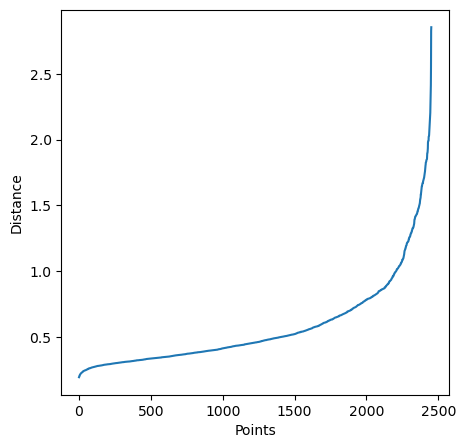

In [99]:

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

plt.savefig("Distance_curve.png", dpi=300)

0.8283147375959364


<Figure size 500x500 with 0 Axes>

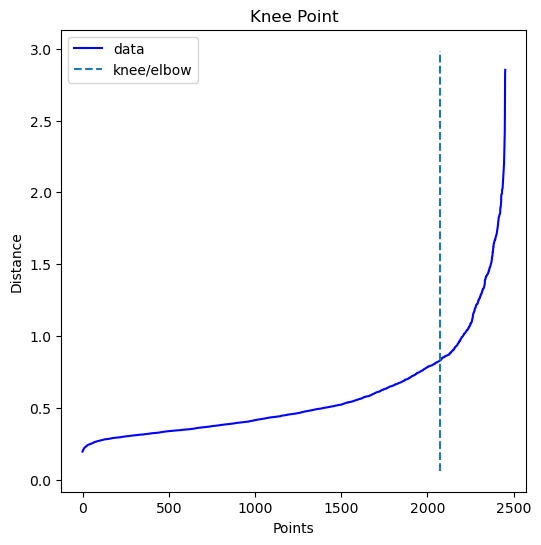

In [100]:

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("knee.png", dpi=300)
print(distances[knee.knee])

In [92]:
#Scegliere il valore di minpoints
min_pts = 4 #Generalmente si scglie minpoints 4
min_pts_distance = list()

for i in range(len(X)):
    neigh_idx = np.argsort(D[i])[min_pts] #prendo l'indice del 4 vicino
    min_pts_distance.append(D[i, neigh_idx]) #salvo la distanza tra il punto i e il suo 4 vicino

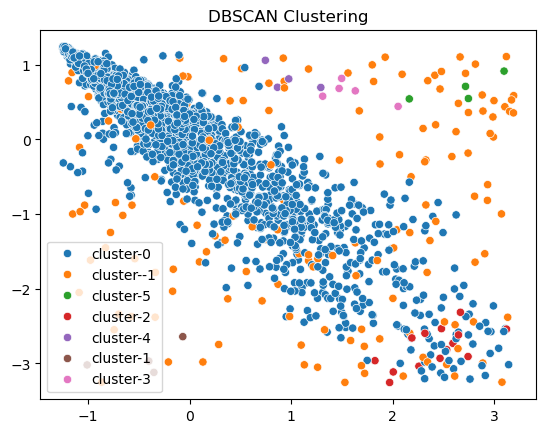

In [106]:

db = DBSCAN(eps=distances[knee.knee], min_samples=4).fit(X)
labels = db.labels_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=["cluster-{}".format(x) for x in labels])
plt.title("DBSCAN Clustering")
plt.savefig("dbscan_with_knee.png", dpi=300)
plt.show()